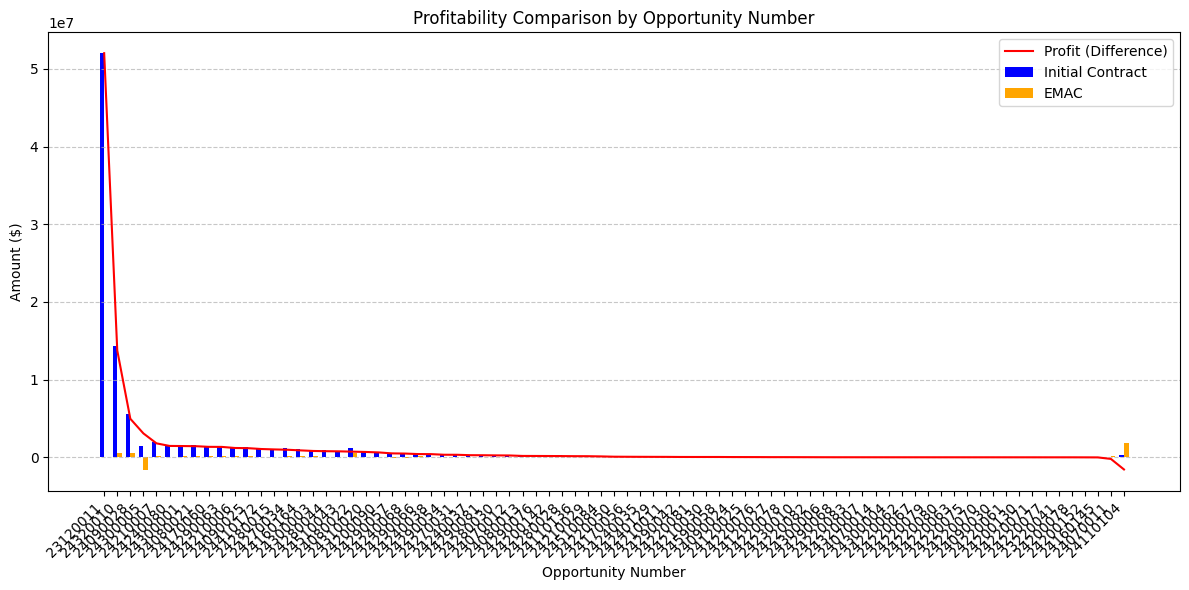

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
file_path = "2024oppts.csv"
data = pd.read_csv(file_path)

# Robust Data Cleaning and Conversion
def clean_currency(value):
    """Handles various currency formats and missing values."""
    if isinstance(value, str):
        # Remove commas and whitespace, then replace empty strings with NaN
        cleaned_value = value.replace(",", "").strip()
        if cleaned_value == "":
            return pd.NA  # Use Pandas' missing value indicator
        try:
            return float(cleaned_value)
        except ValueError:
            return pd.NA  # Handle unparseable strings
    elif pd.isna(value):  # Check for existing NaN values
        return pd.NA
    else:
        try:
            return float(value)  # Convert directly if already numeric
        except ValueError:
            return pd.NA

# Apply the cleaning function to 'init_contract' and 'emac'
data['init_contract'] = data['init_contract'].apply(clean_currency)
data['emac'] = data['emac'].apply(clean_currency)

# Convert to numeric, coercing errors to NaN
data['init_contract'] = pd.to_numeric(data['init_contract'], errors='coerce')
data['emac'] = pd.to_numeric(data['emac'], errors='coerce')

# Calculate profit and filter valid data
data['profit'] = data['init_contract'] - data['emac']
valid_data = data[data['profit'].notna()].copy()

# Prepare for plotting
valid_data['oppt_num'] = valid_data['oppt_num'].astype(str)  # Convert to string for better labeling
grouped_data = valid_data.groupby('oppt_num')[['init_contract', 'emac', 'profit']].mean()
grouped_data = grouped_data.sort_values('profit', ascending=False)

# Create figure with proper sizing
plt.figure(figsize=(12, 6))

# Plot grouped bar chart
x = range(len(grouped_data))
width = 0.35
plt.bar(x, grouped_data['init_contract'], width, label='Initial Contract', color='blue')
plt.bar([i + width for i in x], grouped_data['emac'], width, label='EMAC', color='orange')

# Add profit line
plt.plot([i + width/2 for i in x], grouped_data['profit'], 'r-', label='Profit (Difference)')

# Formatting
plt.title('Profitability Comparison by Opportunity Number')
plt.xlabel('Opportunity Number')
plt.ylabel('Amount ($)')
plt.xticks([i + width/2 for i in x], grouped_data.index, rotation=45, ha='right') # Rotate and align
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


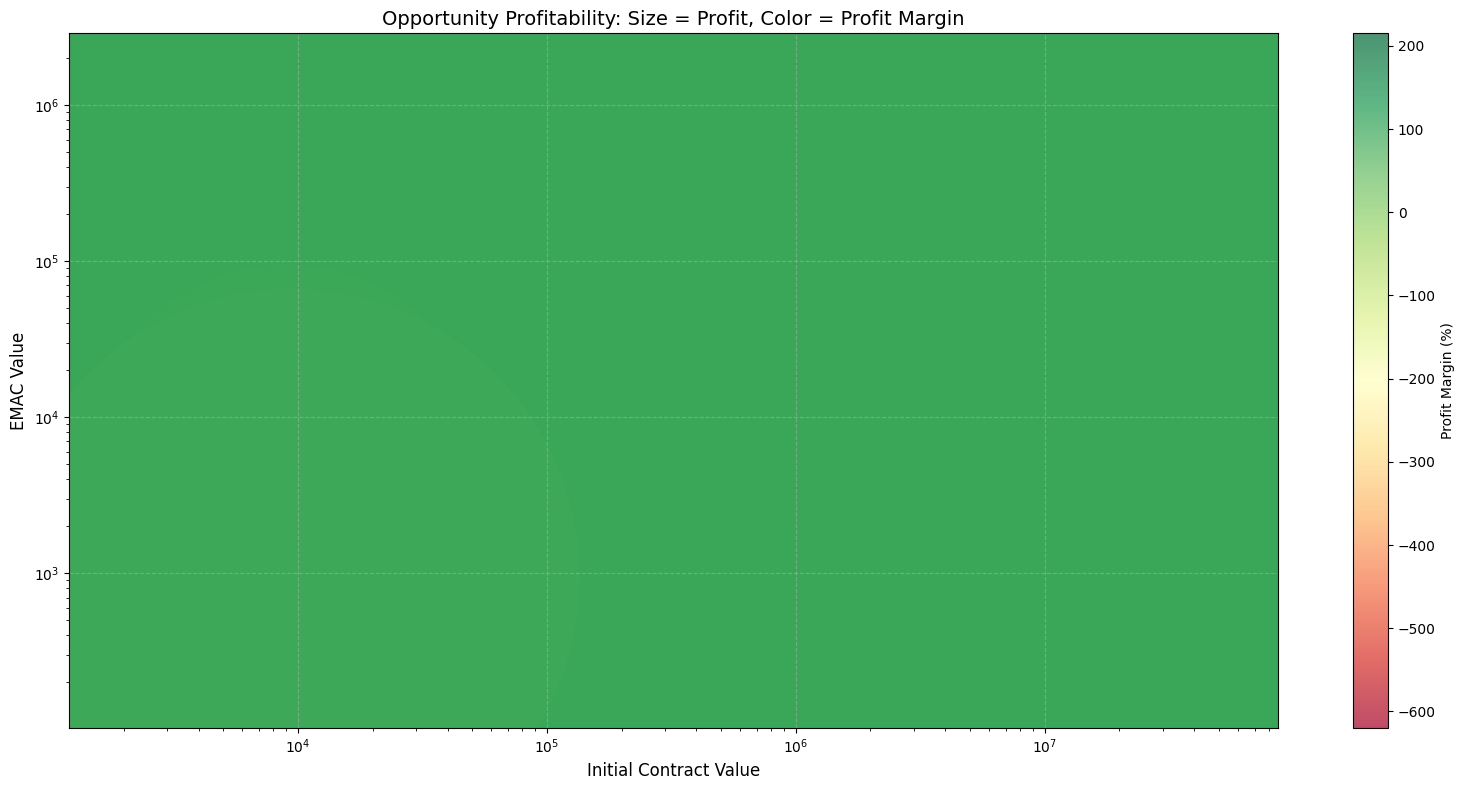

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Load the data
file_path = "2024oppts.csv"
data = pd.read_csv(file_path)

# Data Cleaning and Conversion
def clean_currency(value):
    if isinstance(value, str):
        cleaned_value = value.replace(",", "").strip()
        try:
            num = float(cleaned_value)
            if np.isinf(num):
                return np.nan
            return num
        except ValueError:
            return np.nan
    elif pd.isna(value):
        return np.nan
    else:
        try:
            num = float(value)
            if np.isinf(num):
                return np.nan
            return num
        except ValueError:
            return np.nan

data['init_contract'] = data['init_contract'].apply(clean_currency)
data['emac'] = data['emac'].apply(clean_currency)

# Drop rows where 'init_contract' or 'emac' is NaN
data = data.dropna(subset=['init_contract', 'emac'])

# Calculate Profit and Profit Margin
data['profit'] = data['init_contract'] - data['emac']

#Handle zero values in 'init_contract' before calculating profit margin.
data['profit_margin'] = np.where(data['init_contract'] != 0, (data['profit'] / data['init_contract']) * 100, 0)

data = data.dropna(subset=['profit_margin']) #Drop rows where profit margin is NaN

# Size Scaling for Better Visualization
size_factor = 20  # Adjust this to scale marker sizes appropriately.  Increased size to see smaller markers.
data['marker_size'] = abs(data['profit']) * size_factor  # Use absolute profit for size

# Remove any remaining infinites
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['marker_size'])

# Color Mapping for Profit Margin
cmap = plt.get_cmap('RdYlGn')  # Red-Yellow-Green colormap
norm = mcolors.Normalize(vmin=data['profit_margin'].min(), vmax=data['profit_margin'].max())

# Create the Scatter Plot
fig, ax = plt.subplots(figsize=(16, 8))  # Create figure and axes objects explicitly
scatter = ax.scatter(  # Assign the scatter plot to a variable
    data['init_contract'],
    data['emac'],
    s=data['marker_size'],  # Size represents profit
    c=data['profit_margin'],  # Color represents profit margin
    cmap=cmap,
    norm=norm,
    alpha=0.7  # Adjust transparency
)

# Add Labels and Title
ax.set_xlabel('Initial Contract Value', fontsize=12)
ax.set_ylabel('EMAC Value', fontsize=12)
ax.set_title('Opportunity Profitability: Size = Profit, Color = Profit Margin', fontsize=14)

# Add a Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Fix for older Matplotlib versions
cbar = fig.colorbar(scatter, label='Profit Margin (%)')  # Pass the scatter plot to colorbar

# Add a Grid
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')

# Tight Layout
plt.tight_layout()

# Show the Plot
plt.show()



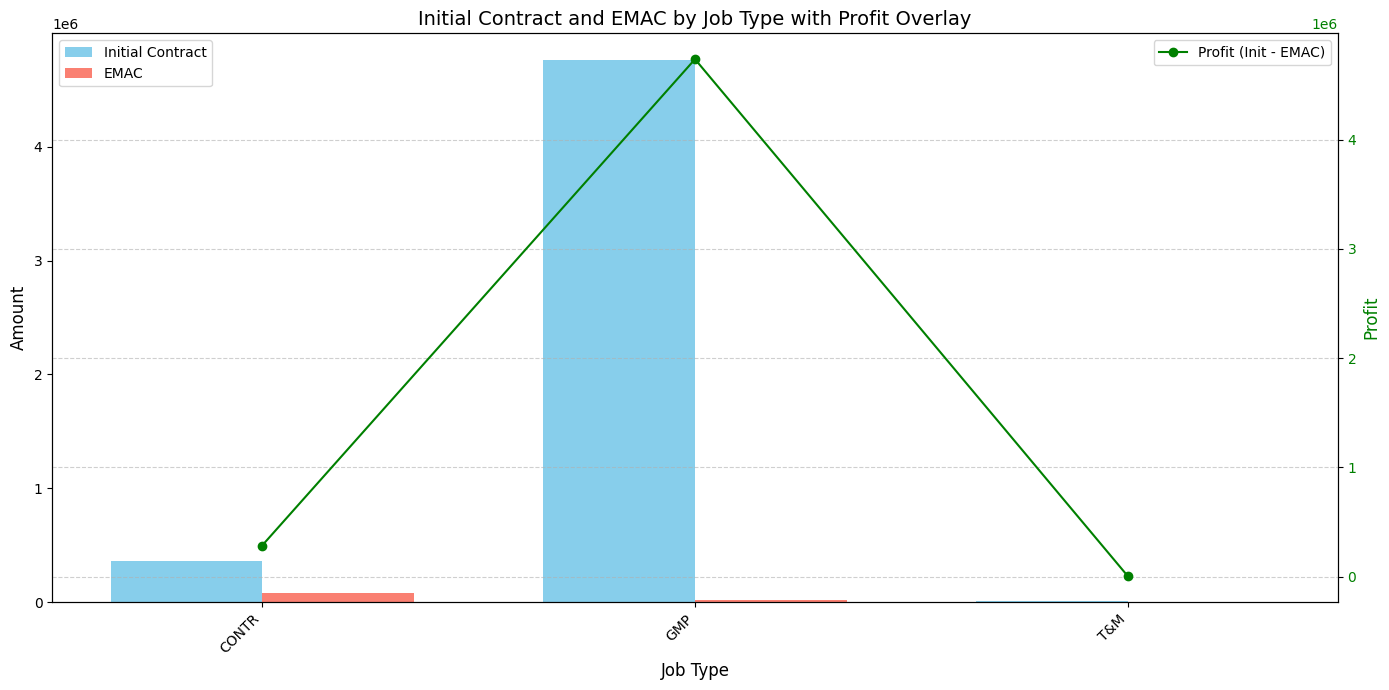

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = "2024oppts.csv"
data = pd.read_csv(file_path)

# Data Cleaning and Conversion
def clean_currency(value):
    if isinstance(value, str):
        cleaned_value = value.replace(",", "").strip()
        try:
            return float(cleaned_value)
        except ValueError:
            return np.nan  # or pd.NA if you prefer
    elif pd.isna(value):
        return np.nan
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan

data['init_contract'] = data['init_contract'].apply(clean_currency)
data['emac'] = data['emac'].apply(clean_currency)

# Group by 'job_type' and calculate the mean of 'init_contract' and 'emac'
grouped_data = data.groupby('job_type')[['init_contract', 'emac']].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for init_contract and emac
bar_width = 0.35
x = np.arange(len(grouped_data.index))

rects1 = ax1.bar(x - bar_width/2, grouped_data['init_contract'], bar_width, label='Initial Contract', color='skyblue')
rects2 = ax1.bar(x + bar_width/2, grouped_data['emac'], bar_width, label='EMAC', color='salmon')

# Line graph for profit (init_contract - emac)
profit = grouped_data['init_contract'] - grouped_data['emac']
ax2 = ax1.twinx()  # Create a second axes that shares the same x-axis
ax2.plot(x, profit, color='green', marker='o', linestyle='-', label='Profit (Init - EMAC)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Amount', fontsize=12)
ax1.set_xlabel('Job Type', fontsize=12)
ax1.set_title('Initial Contract and EMAC by Job Type with Profit Overlay', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(grouped_data.index, rotation=45, ha="right")
ax1.legend(loc='upper left')

ax2.set_ylabel('Profit', color='green', fontsize=12)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



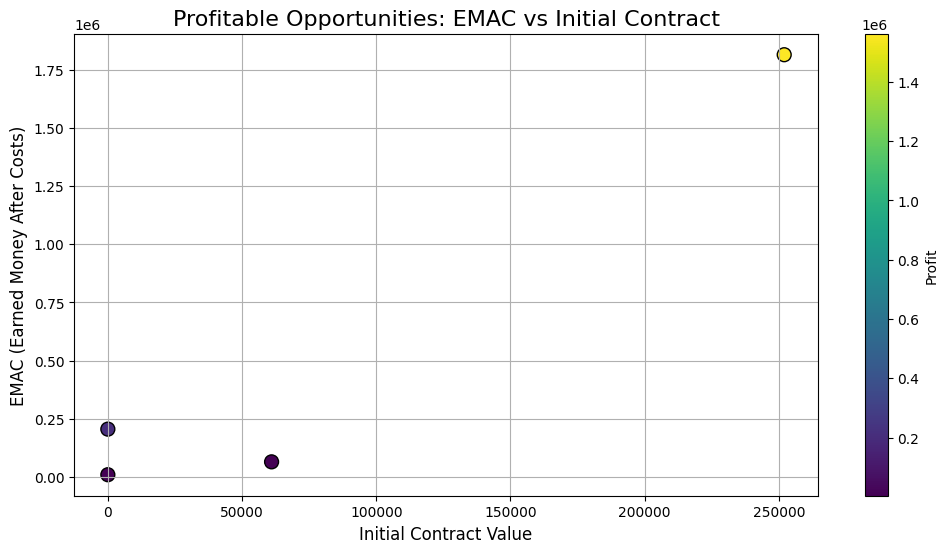

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "2024oppts.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Calculate profit or loss
data['Profit'] = data['emac'] - data['init_contract']

# Filter data for opportunities that made profits
profitable_opportunities = data[data['Profit'] > 0]

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(profitable_opportunities['init_contract'], profitable_opportunities['emac'], 
            c=profitable_opportunities['Profit'], cmap='viridis', s=100, edgecolor='k')

# Adding labels and title
plt.title('Profitable Opportunities: EMAC vs Initial Contract', fontsize=16)
plt.xlabel('Initial Contract Value', fontsize=12)
plt.ylabel('EMAC (Earned Money After Costs)', fontsize=12)
plt.colorbar(label='Profit')
plt.grid(True)

# Show plot
plt.show()


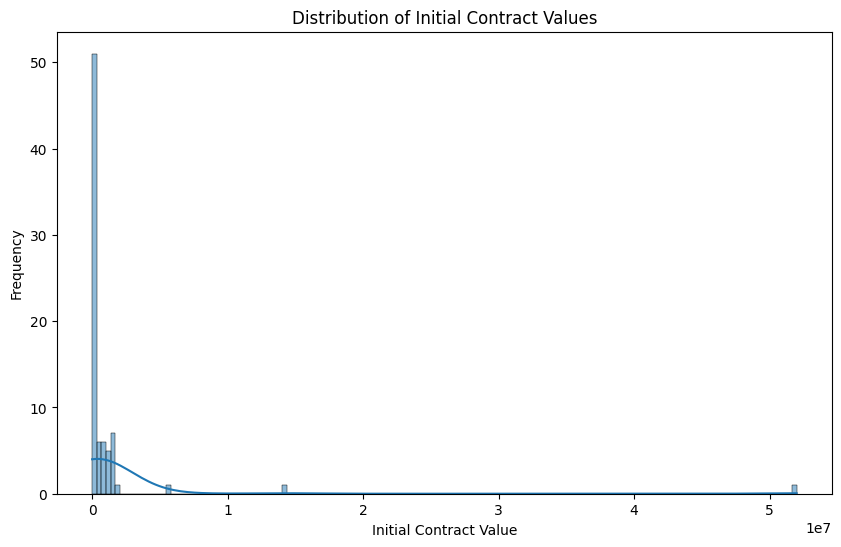

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "2024oppts.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Calculate profit
data['Profit'] = data['emac'] - data['init_contract']

## Univariate Analysis

### Histogram of Initial Contract Values
plt.figure(figsize=(10, 6))
sns.histplot(data['init_contract'], kde=True)
plt.title('Distribution of Initial Contract Values')
plt.xlabel('Initial Contract Value')
plt.ylabel('Frequency')
plt.show()

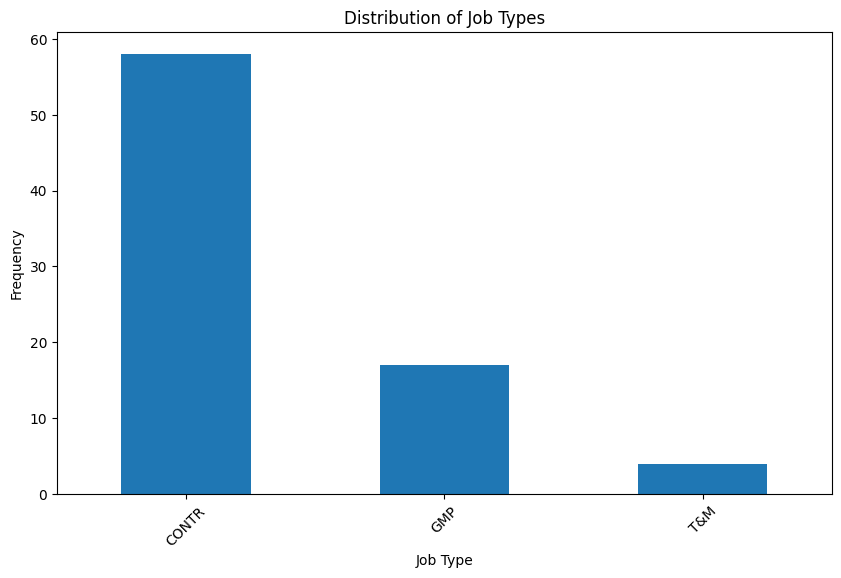

In [3]:
plt.figure(figsize=(10, 6))
data['job_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

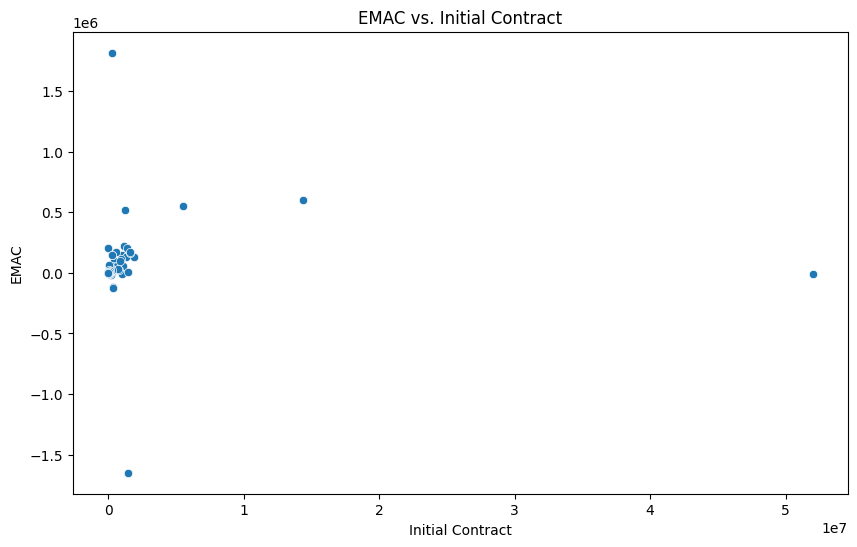

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='init_contract', y='emac', data=data)
plt.title('EMAC vs. Initial Contract')
plt.xlabel('Initial Contract')
plt.ylabel('EMAC')
plt.show()

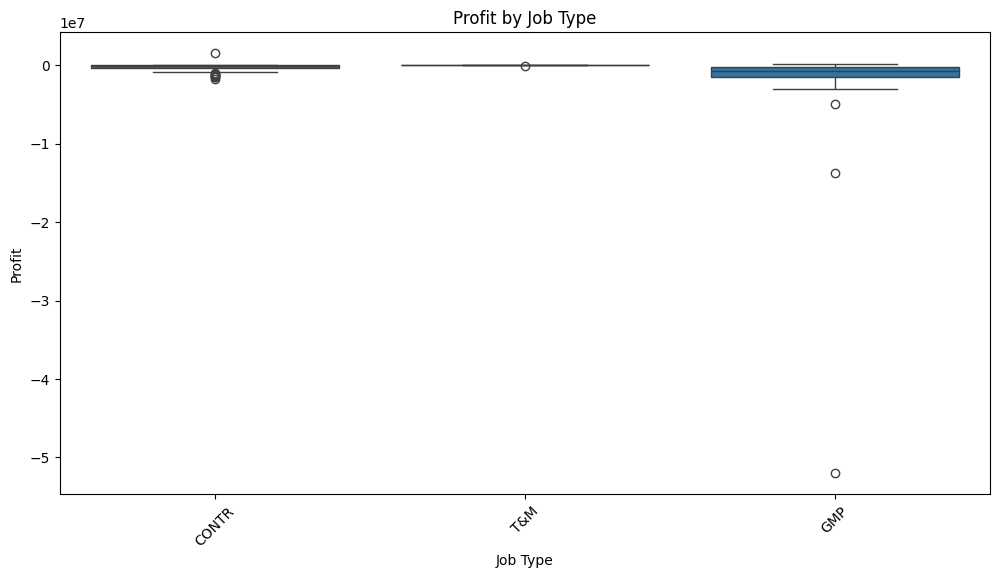

In [5]:
### Box Plot of Profit by Job Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_type', y='Profit', data=data)
plt.title('Profit by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

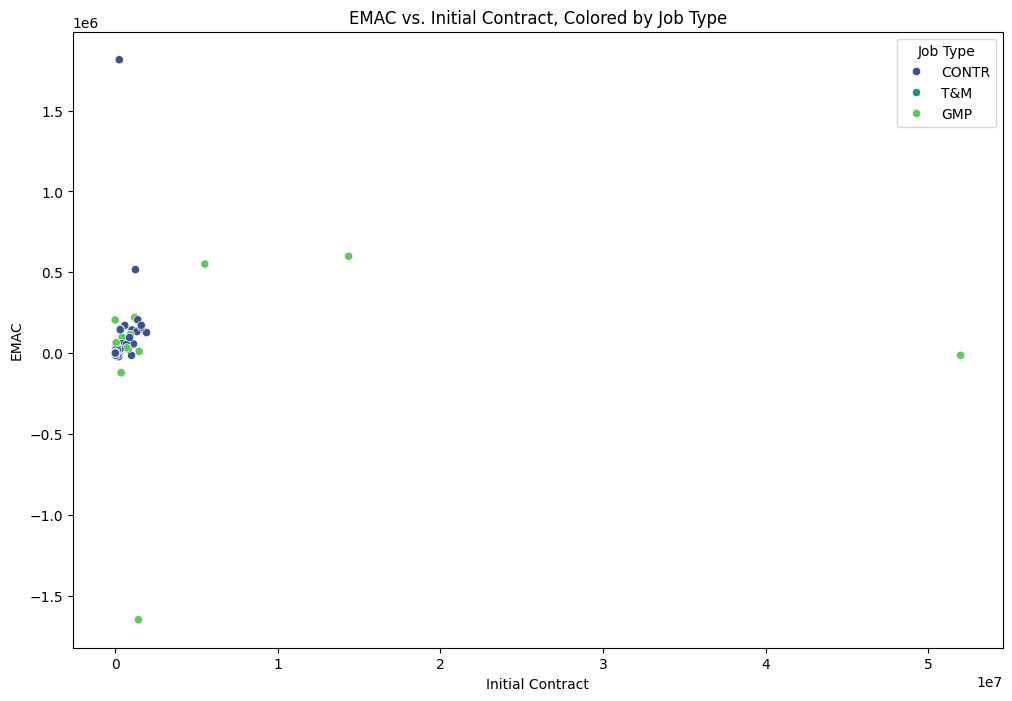

In [6]:
### Scatter Plot with Color-coded Job Types
plt.figure(figsize=(12, 8))
sns.scatterplot(x='init_contract', y='emac', hue='job_type', data=data, palette='viridis')
plt.title('EMAC vs. Initial Contract, Colored by Job Type')
plt.xlabel('Initial Contract')
plt.ylabel('EMAC')
plt.legend(title='Job Type')
plt.show()

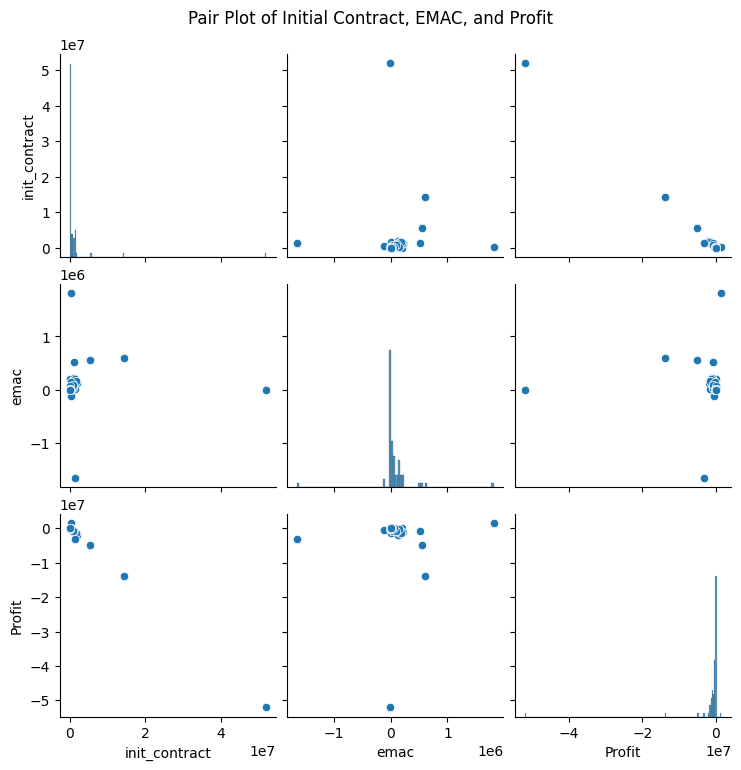

In [7]:
### Pair Plot
sns.pairplot(data[['init_contract', 'emac', 'Profit']])
plt.suptitle('Pair Plot of Initial Contract, EMAC, and Profit', y=1.02)
plt.show()

#The pair plot provides a matrix of scatter plots for all pairs of variables,
#along with histograms on the diagonal, giving a comprehensive view of relationships.

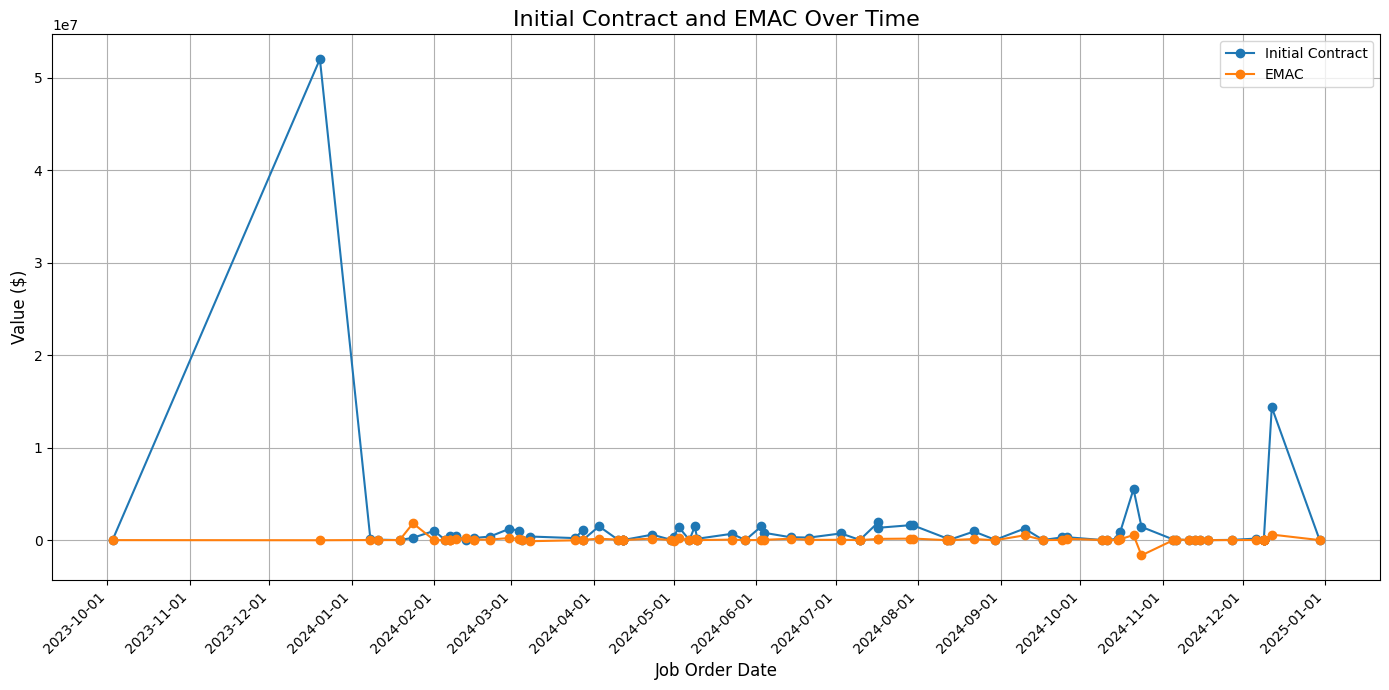

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = "2024oppts.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Convert job_odate to datetime
data['job_odate'] = pd.to_datetime(data['job_odate'])

# Sort the DataFrame by job_odate
data = data.sort_values(by='job_odate')

# Plotting the line chart
plt.figure(figsize=(14, 7))
plt.plot(data['job_odate'], data['init_contract'], marker='o', linestyle='-', label='Initial Contract')
plt.plot(data['job_odate'], data['emac'], marker='o', linestyle='-', label='EMAC')

# Customize the plot
plt.title('Initial Contract and EMAC Over Time', fontsize=16)
plt.xlabel('Job Order Date', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.grid(True)
plt.legend()

# Format the date on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


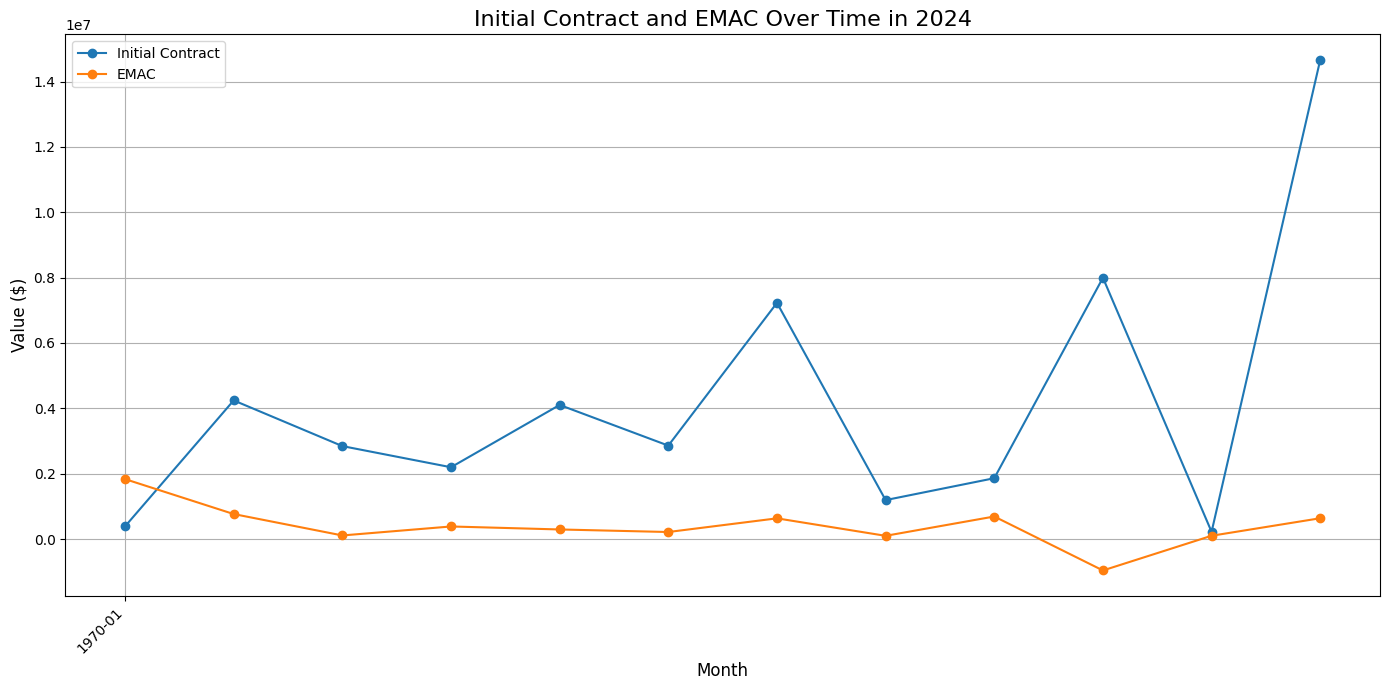

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = "2024oppts.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Convert job_odate to datetime
data['job_odate'] = pd.to_datetime(data['job_odate'])

# Filter data for the year 2024
data_2024 = data[data['job_odate'].dt.year == 2024]

# Group by month and sum the init_contract and emac values
monthly_data = data_2024.groupby(data_2024['job_odate'].dt.strftime('%Y-%m'))[['init_contract', 'emac']].sum()

# Plotting the line chart
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['init_contract'], marker='o', linestyle='-', label='Initial Contract')
plt.plot(monthly_data.index, monthly_data['emac'], marker='o', linestyle='-', label='EMAC')

# Customize the plot
plt.title('Initial Contract and EMAC Over Time in 2024', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.grid(True)
plt.legend()

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


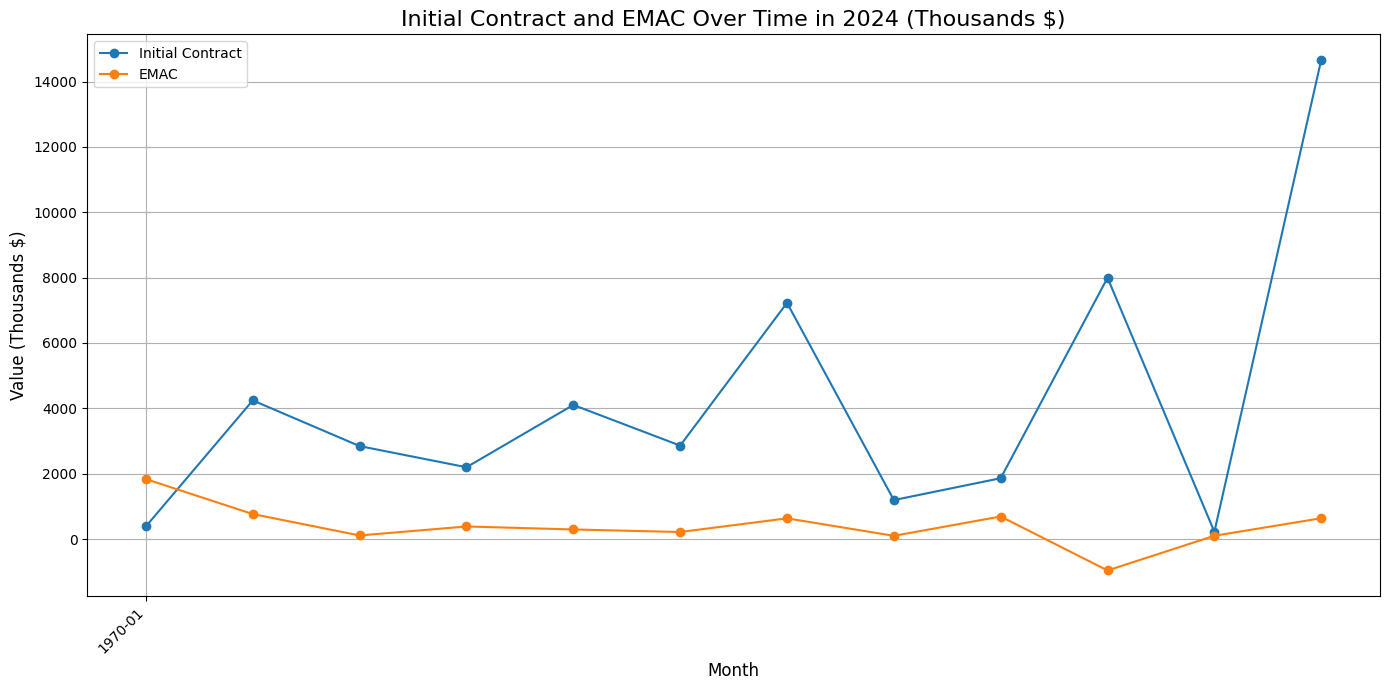

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = "2024oppts.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Convert job_odate to datetime
data['job_odate'] = pd.to_datetime(data['job_odate'])

# Filter data for the year 2024
data_2024 = data[data['job_odate'].dt.year == 2024]

# Group by month and sum the init_contract and emac values
monthly_data = data_2024.groupby(data_2024['job_odate'].dt.strftime('%Y-%m'))[['init_contract', 'emac']].sum()

# Convert values to thousands
monthly_data['init_contract'] = monthly_data['init_contract'] / 1000
monthly_data['emac'] = monthly_data['emac'] / 1000

# Plotting the line chart
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['init_contract'], marker='o', linestyle='-', label='Initial Contract')
plt.plot(monthly_data.index, monthly_data['emac'], marker='o', linestyle='-', label='EMAC')

# Customize the plot
plt.title('Initial Contract and EMAC Over Time in 2024 (Thousands $)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Value (Thousands $)', fontsize=12)
plt.grid(True)
plt.legend()

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


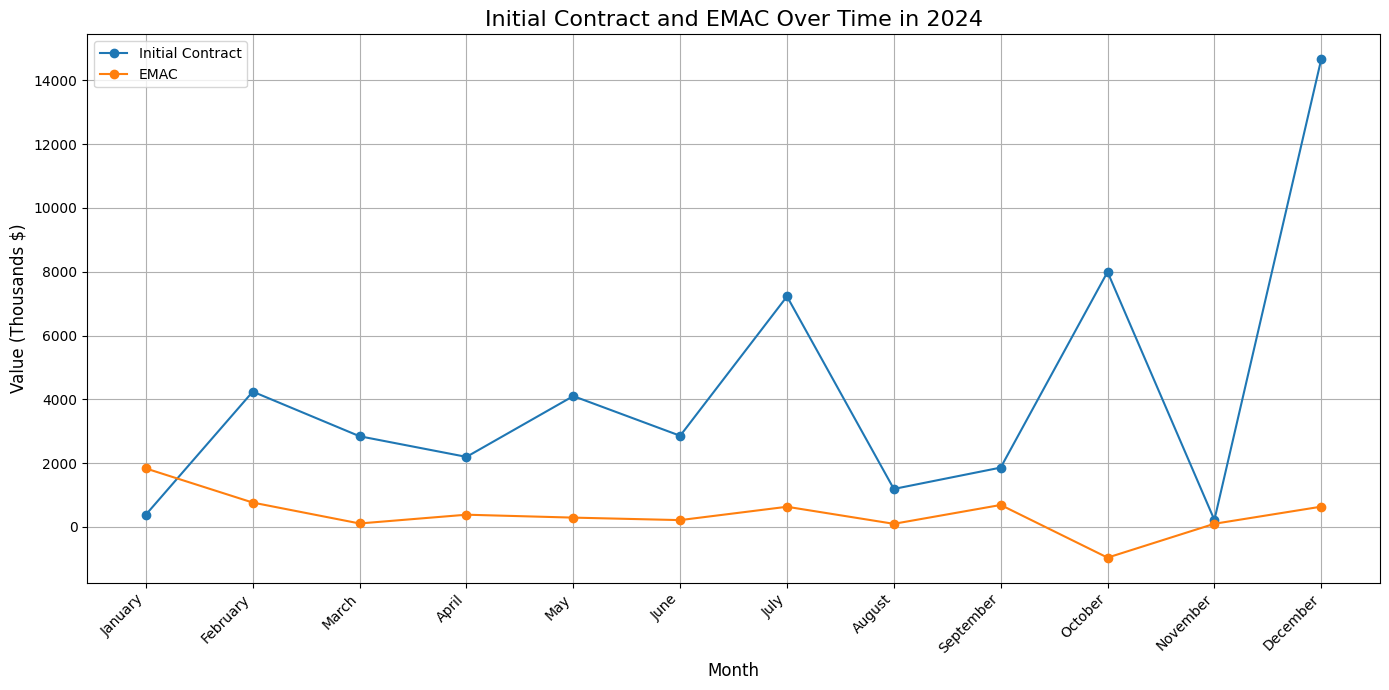

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = "2024oppts.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Convert job_odate to datetime
data['job_odate'] = pd.to_datetime(data['job_odate'])

# Filter data for the year 2024
data_2024 = data[data['job_odate'].dt.year == 2024]

# Group by month and sum the init_contract and emac values
monthly_data = data_2024.groupby(data_2024['job_odate'].dt.month)[['init_contract', 'emac']].sum()

# Convert values to thousands
monthly_data['init_contract'] = monthly_data['init_contract'] / 1000
monthly_data['emac'] = monthly_data['emac'] / 1000

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the line chart
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['init_contract'], marker='o', linestyle='-', label='Initial Contract')
plt.plot(monthly_data.index, monthly_data['emac'], marker='o', linestyle='-', label='EMAC')

# Customize the plot
plt.title('Initial Contract and EMAC Over Time in 2024', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Value (Thousands $)', fontsize=12)
plt.grid(True)
plt.legend()

# Set x-axis ticks to month names
plt.xticks(monthly_data.index, month_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()


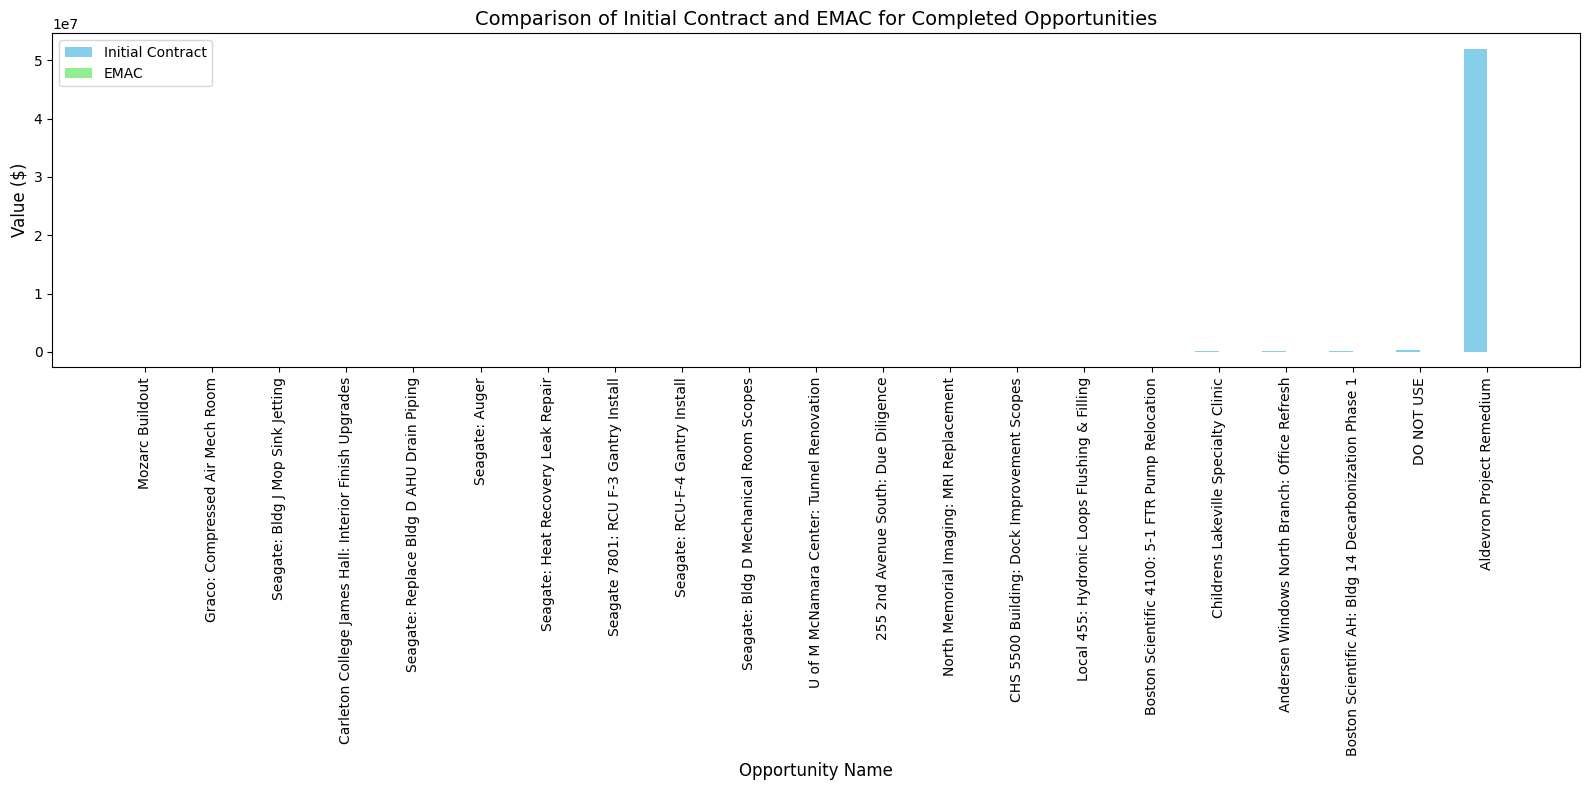

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "2024oppts.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Filter for opportunities with job_status as "COMPLETE"
completed_opps = data[data['job_status'] == 'COMPLETE'].copy()

# Calculate profit for each completed opportunity
completed_opps['Profit'] = completed_opps['emac'] - completed_opps['init_contract']

# Sort by profit (optional, for better visualization)
completed_opps = completed_opps.sort_values(by='Profit', ascending=False)

# Plotting the comparison of init_contract and emac for completed opportunities
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability

bar_width = 0.35  # Width of the bars

index = range(len(completed_opps))  # Index for each opportunity

plt.bar(index, completed_opps['init_contract'], width=bar_width, label='Initial Contract', color='skyblue')
plt.bar([i + bar_width for i in index], completed_opps['emac'], width=bar_width, label='EMAC', color='lightgreen')

# Customize the plot
plt.xlabel('Opportunity Name', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.title('Comparison of Initial Contract and EMAC for Completed Opportunities', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], completed_opps['oppt_name'], rotation=90, ha='center')  # Rotate labels for readability
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


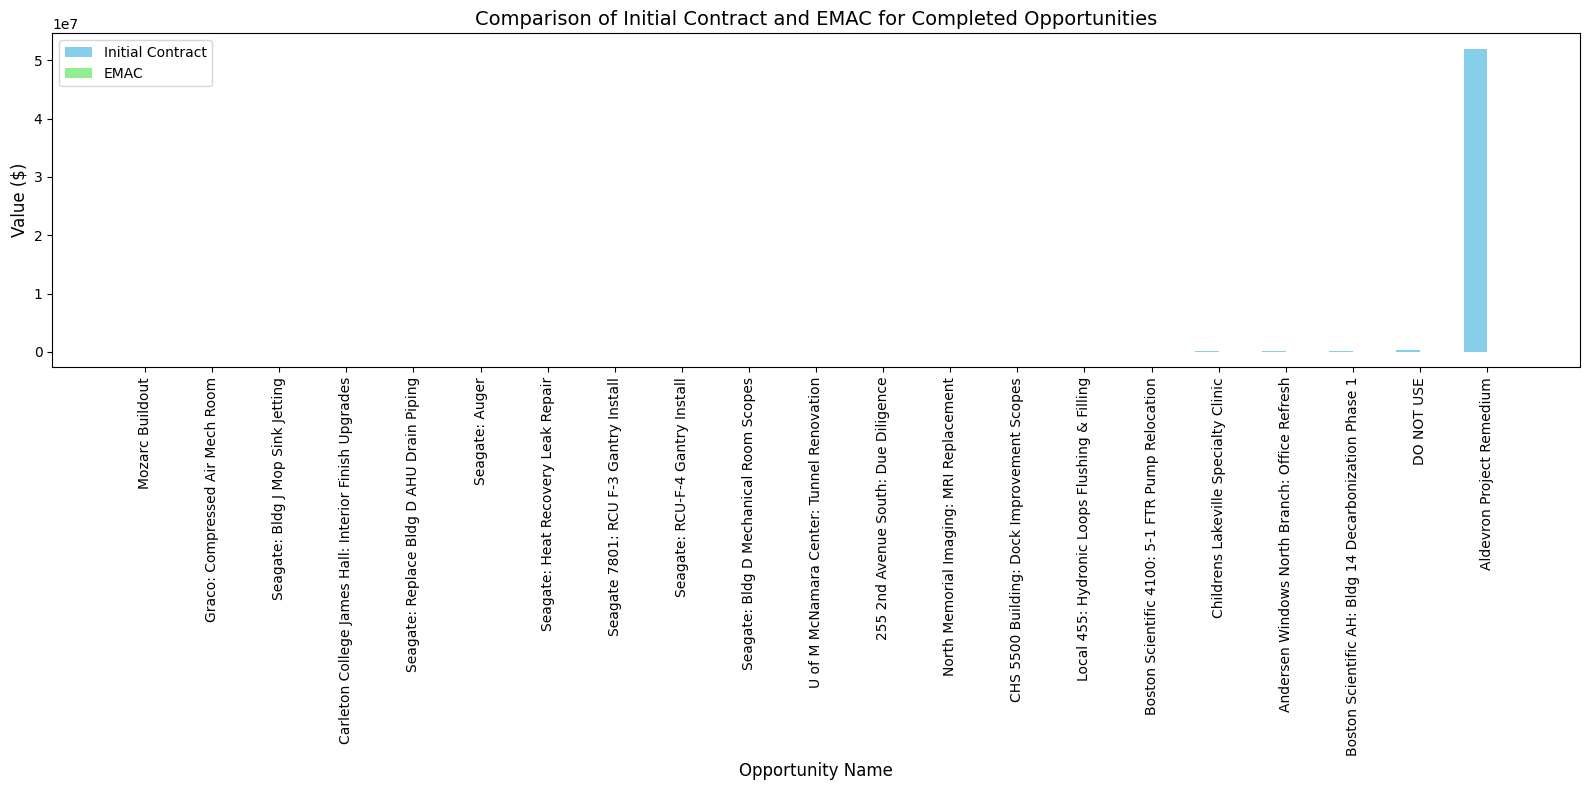

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "2024oppts.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Filter for opportunities with job_status as "COMPLETE"
completed_opps = data[data['job_status'] == 'COMPLETE'].copy()

# Calculate profit for each completed opportunity
completed_opps['Profit'] = completed_opps['emac'] - completed_opps['init_contract']

# Sort by profit (optional, for better visualization)
completed_opps = completed_opps.sort_values(by='Profit', ascending=False)

# Choose either line or bar chart
chart_type = 'bar'  # Change to 'line' for a line chart

# Plotting the comparison of init_contract and emac for completed opportunities
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability

if chart_type == 'bar':
    bar_width = 0.35  # Width of the bars
    index = range(len(completed_opps))  # Index for each opportunity

    plt.bar(index, completed_opps['init_contract'], width=bar_width, label='Initial Contract', color='skyblue')
    plt.bar([i + bar_width for i in index], completed_opps['emac'], width=bar_width, label='EMAC', color='lightgreen')

    # Customize the plot
    plt.xlabel('Opportunity Name', fontsize=12)
    plt.ylabel('Value ($)', fontsize=12)
    plt.title('Comparison of Initial Contract and EMAC for Completed Opportunities', fontsize=14)
    plt.xticks([i + bar_width / 2 for i in index], completed_opps['oppt_name'], rotation=90, ha='center')  # Rotate labels for readability
    plt.legend()
    plt.tight_layout()

elif chart_type == 'line':
    plt.plot(completed_opps['oppt_name'], completed_opps['init_contract'], marker='o', linestyle='-', label='Initial Contract', color='skyblue')
    plt.plot(completed_opps['oppt_name'], completed_opps['emac'], marker='o', linestyle='-', label='EMAC', color='lightgreen')

    # Customize the plot
    plt.xlabel('Opportunity Name', fontsize=12)
    plt.ylabel('Value ($)', fontsize=12)
    plt.title('Comparison of Initial Contract and EMAC for Completed Opportunities', fontsize=14)
    plt.xticks(rotation=90, ha='right')  # Rotate labels for readability
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

else:
    print("Invalid chart_type. Choose 'line' or 'bar'.")

# Show plot
plt.show()


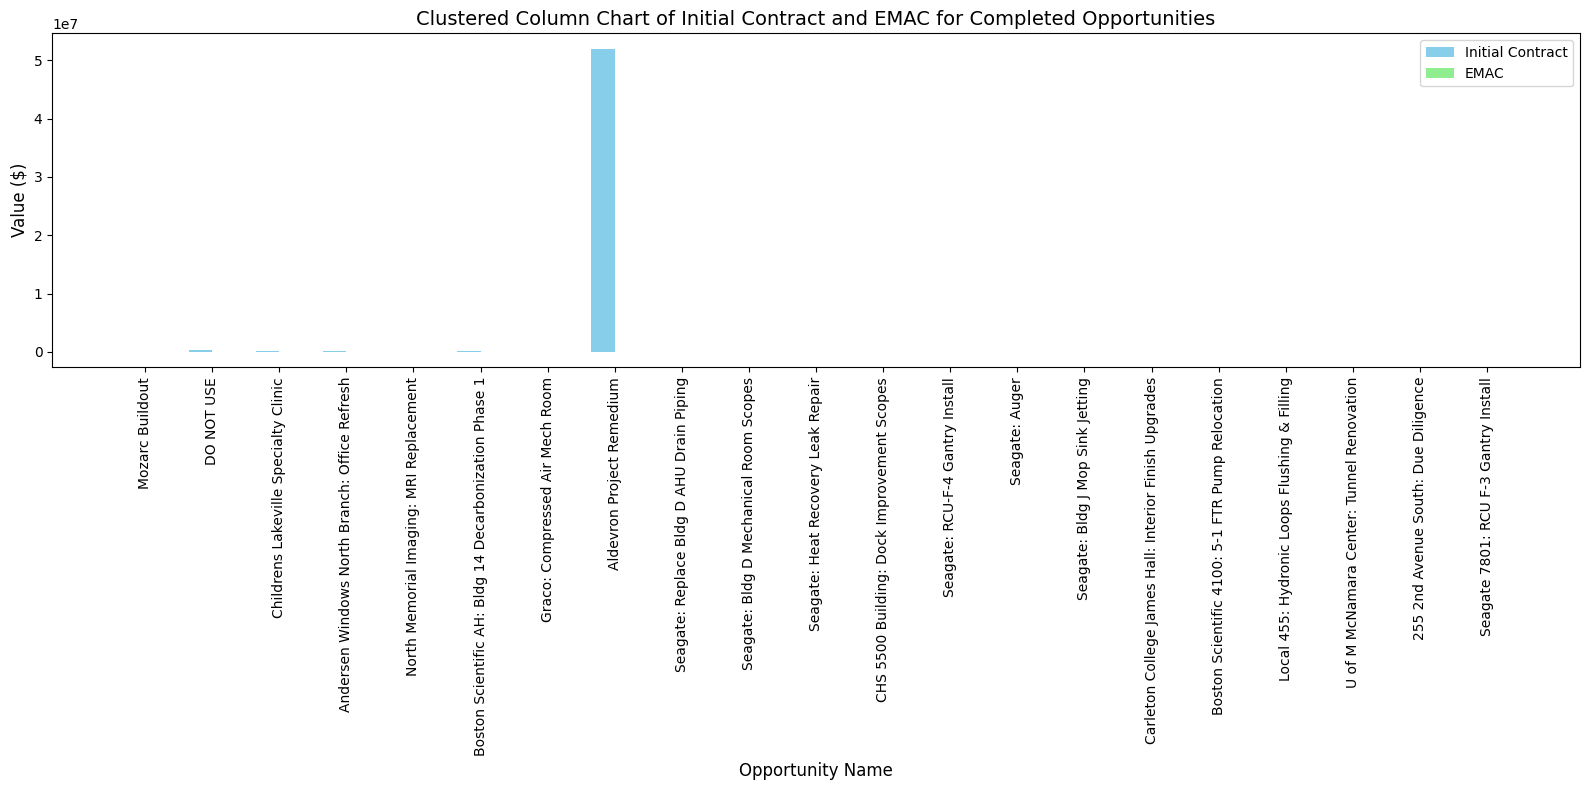

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "2024oppts.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Filter for opportunities with job_status as "COMPLETE"
completed_opps = data[data['job_status'] == 'COMPLETE'].copy()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(completed_opps))
r2 = [x + bar_width for x in r1]

# Plotting the clustered column chart
plt.figure(figsize=(16, 8))
plt.bar(r1, completed_opps['init_contract'], color='skyblue', width=bar_width, label='Initial Contract')
plt.bar(r2, completed_opps['emac'], color='lightgreen', width=bar_width, label='EMAC')

# Add labels and title
plt.xlabel('Opportunity Name', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.title('Clustered Column Chart of Initial Contract and EMAC for Completed Opportunities', fontsize=14)
plt.xticks([r + bar_width/2 for r in range(len(completed_opps))], completed_opps['oppt_name'], rotation=90, ha='center')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


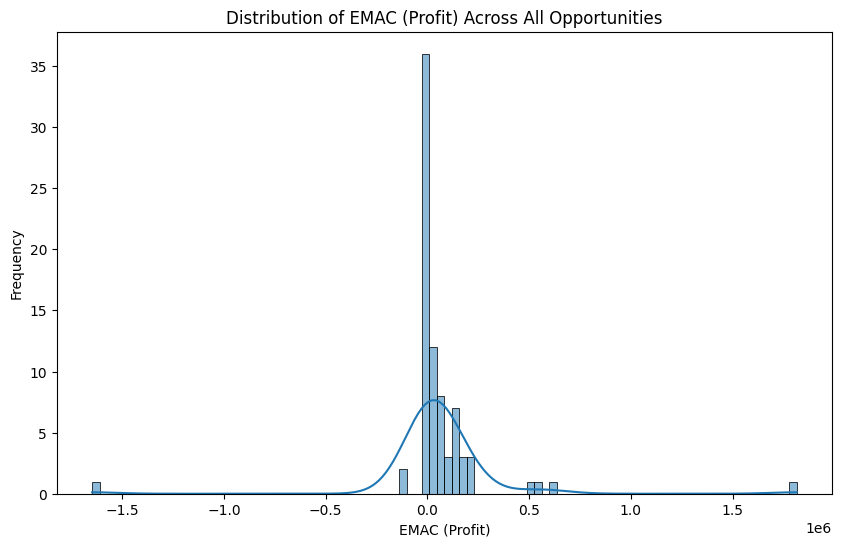

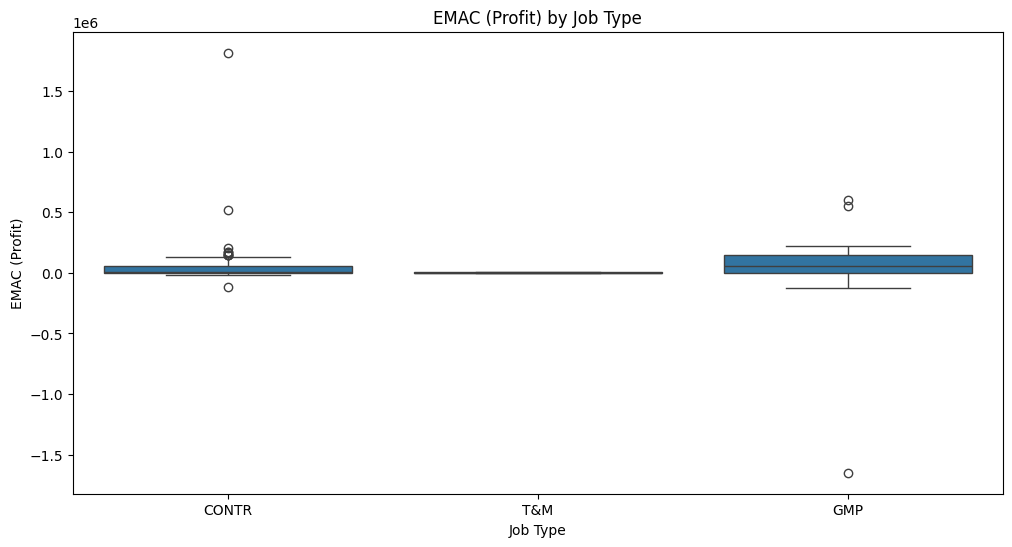

Top 10 Opportunities with Highest EMAC (Profit):
                                          oppt_name  \
3                  TEL MFG: MAGIC Cleanroom Design   
77                     Seagate Wafer South Restart   
62                     7250 France Office Building   
54               Mortenson HQ: Phase 2 Renovations   
13           Target Center: Premium Spaces Remodel   
30  University of Minnesota: Tissue Digest Project   
9       U of M Middlebrook Hall: Dining Renovation   
48                  Fort Snelling: Boilers and CUs   
27                  Niron 650: Grimm Speed Phase 2   
47   University of St Thomas Owens Hall: MicroGrid   

                             customer job_type        emac  
3     TEL Mfg And Engr Of America Inc    CONTR  1814518.00  
77           McGough Construction Inc      GMP   599755.00  
62  Adolphson & Peterson Construction      GMP   551300.00  
54               MA Mortenson Company    CONTR   517003.92  
13               MA Mortenson Company      GMP   2

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Basic distribution of EMAC (Profit)
plt.figure(figsize=(10, 6))
sns.histplot(data['emac'], kde=True)
plt.title('Distribution of EMAC (Profit) Across All Opportunities')
plt.xlabel('EMAC (Profit)')
plt.ylabel('Frequency')
plt.show()

# EMAC (Profit) by Job Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_type', y='emac', data=data)
plt.title('EMAC (Profit) by Job Type')
plt.xlabel('Job Type')
plt.ylabel('EMAC (Profit)')
plt.show()

# Opportunities with the highest EMAC
top_10_emac = data.nlargest(10, 'emac')
print("Top 10 Opportunities with Highest EMAC (Profit):\n", top_10_emac[['oppt_name', 'customer', 'job_type', 'emac']])


In [26]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Create the scatter plot with Plotly
fig = px.scatter(
    data,
    x='init_contract',
    y='emac',
    color='job_type',
    hover_data=['oppt_name', 'customer', 'job_status'],
    title='Comparison of EMAC vs. Initial Contract by Job Type',
    labels={'init_contract': 'Initial Contract Value',
            'emac': 'Earned Money After Costs (EMAC)'}
)

# Customize the layout
fig.update_layout(
    xaxis_title='Initial Contract Value',
    yaxis_title='Earned Money After Costs (EMAC)'
)

# Show the plot
fig.show()


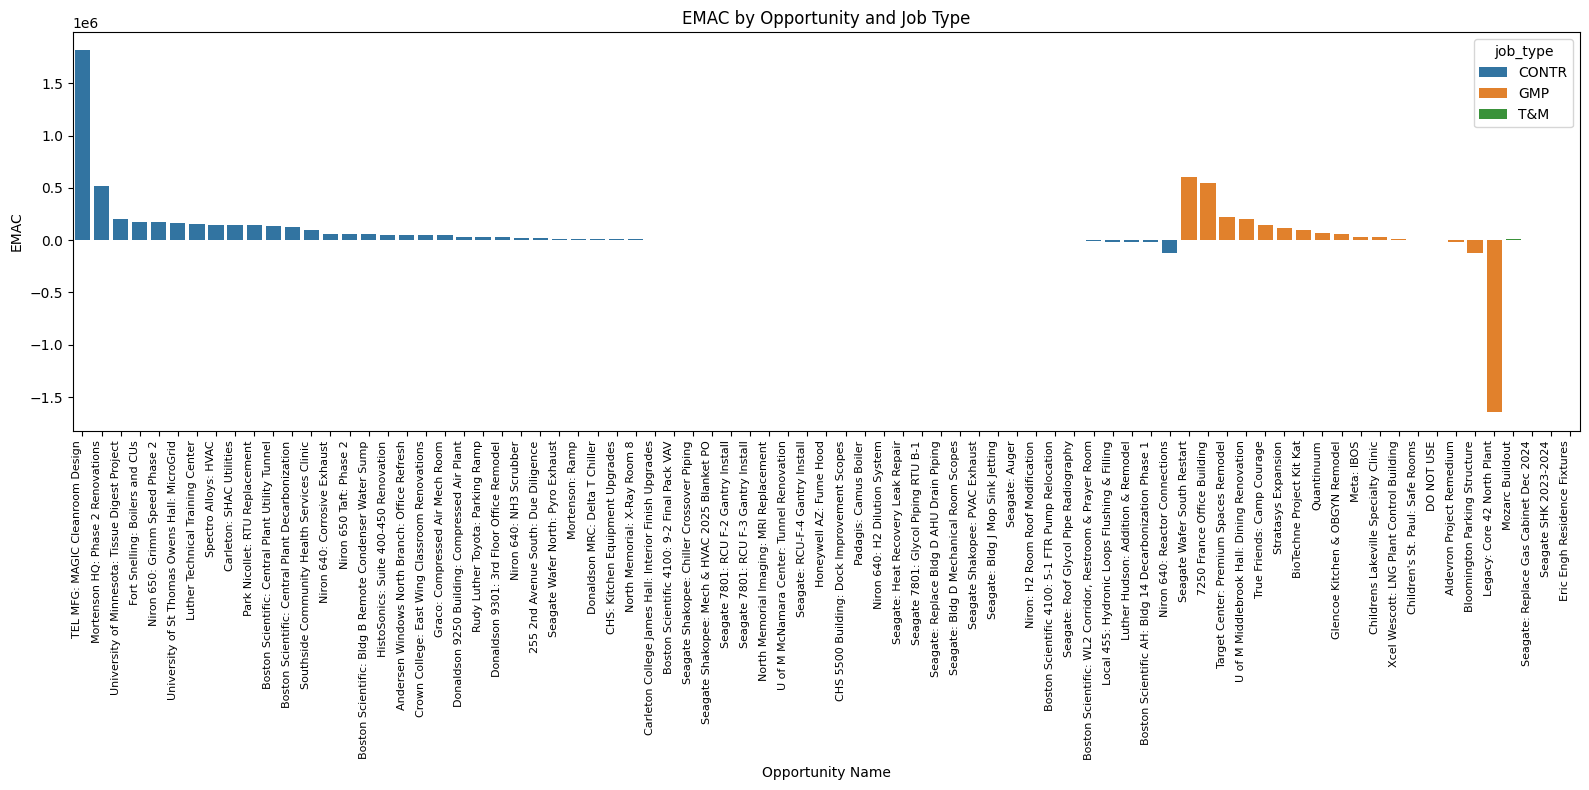

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Sort the data by job_type and then EMAC for better visualization
data = data.sort_values(by=['job_type', 'emac'], ascending=[True, False])

# Create a grouped bar chart
plt.figure(figsize=(16, 8))
sns.barplot(x='oppt_name', y='emac', hue='job_type', data=data)
plt.title('EMAC by Opportunity and Job Type')
plt.xlabel('Opportunity Name')
plt.ylabel('EMAC')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


C:\Users\mvang\AppData\Local\Temp\ipykernel_9060\320002425.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




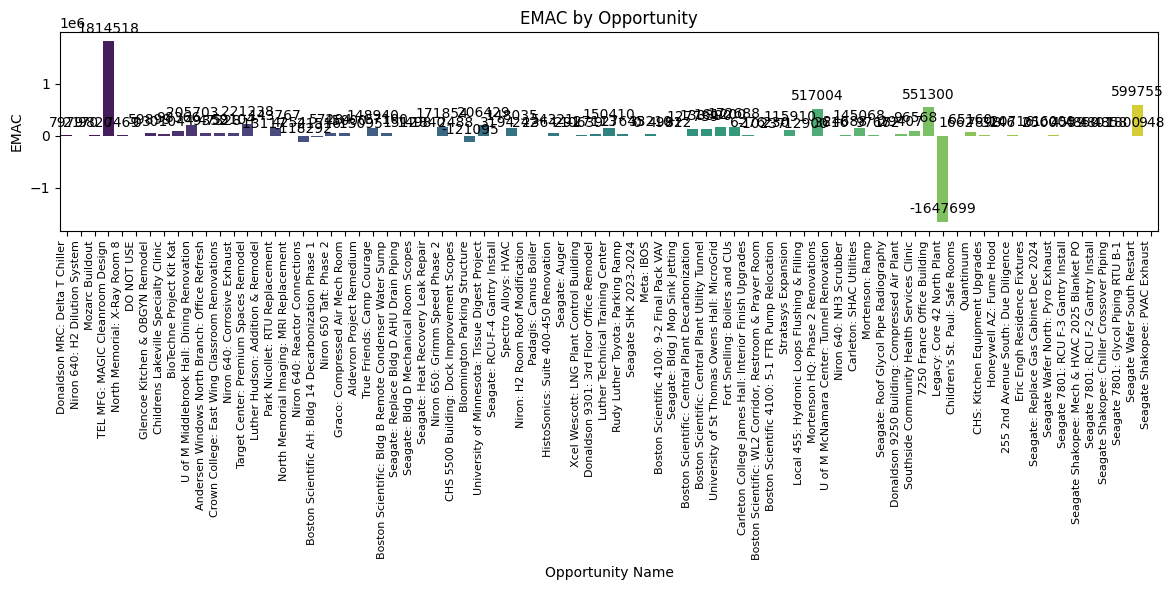

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='oppt_name', y='emac', data=data, palette='viridis')

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Format the value as integer
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Distance from bar in points
                textcoords='offset points')

# Customize the plot
plt.title('EMAC by Opportunity')
plt.xlabel('Opportunity Name')
plt.ylabel('EMAC')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\mvang\AppData\Local\Temp\ipykernel_9060\667167322.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




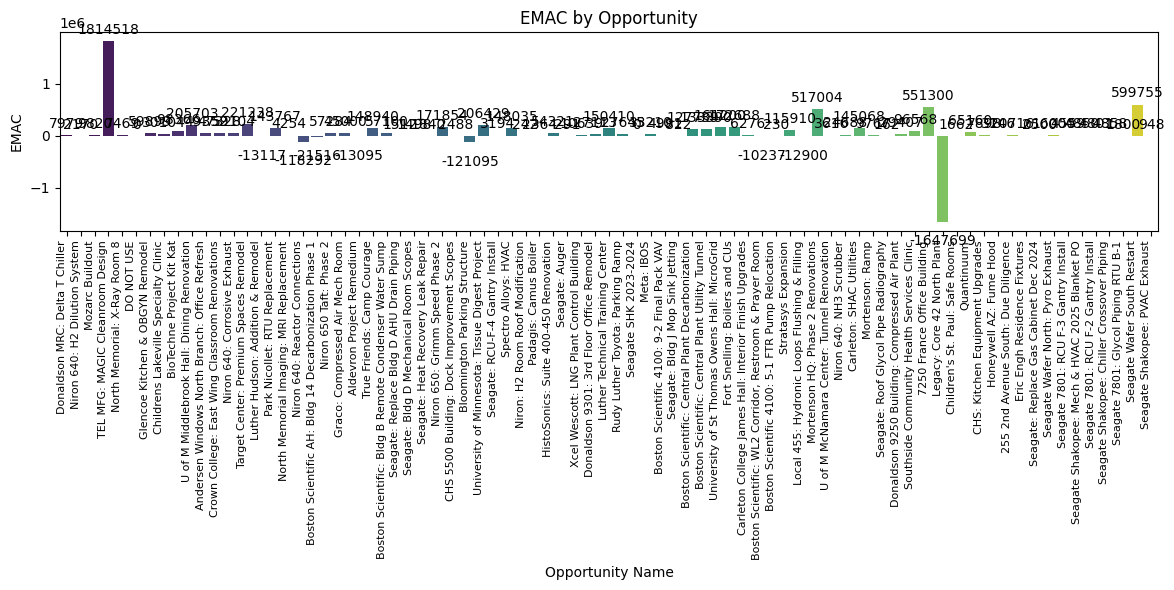

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='oppt_name', y='emac', data=data, palette='viridis')

# Add the values on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 0:
        ax.annotate(f'{height:.0f}',  # Format the value as integer
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',  # Align text at the bottom for positive values
                    xytext=(0, 3),  # Distance from bar in points
                    textcoords='offset points')
    else:
        ax.annotate(f'{height:.0f}',  # Format the value as integer
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='top',  # Align text at the top for negative values
                    xytext=(0, -9),  # Distance from bar in points
                    textcoords='offset points')

# Customize the plot
plt.title('EMAC by Opportunity')
plt.xlabel('Opportunity Name')
plt.ylabel('EMAC')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\mvang\AppData\Local\Temp\ipykernel_9060\3711002680.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




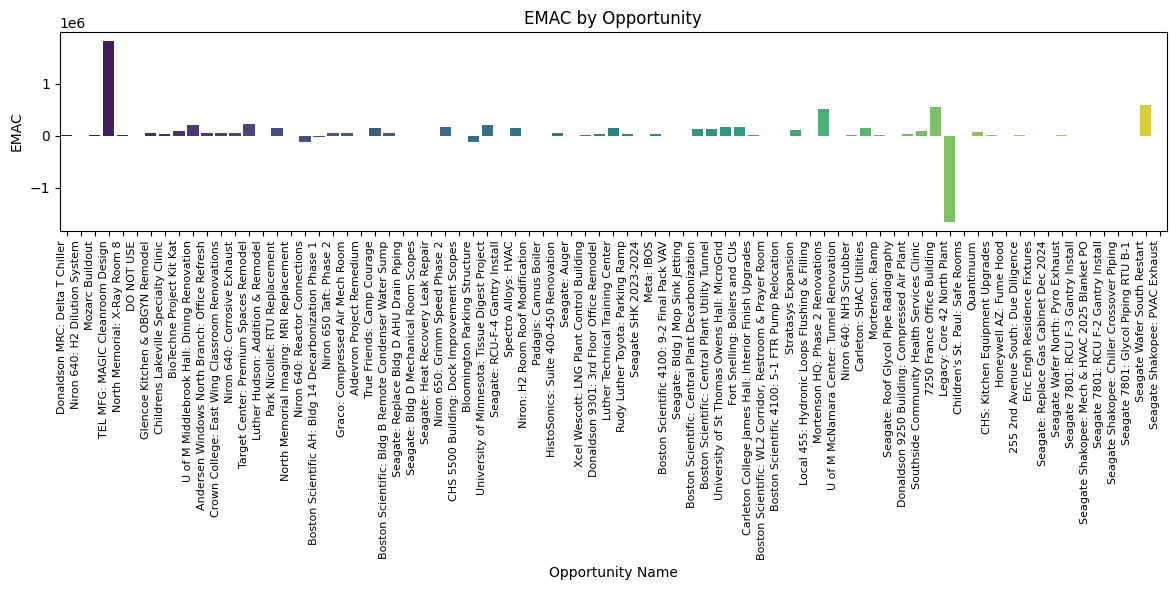

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='oppt_name', y='emac', data=data, palette='viridis')

# Customize the plot
plt.title('EMAC by Opportunity')
plt.xlabel('Opportunity Name')
plt.ylabel('EMAC')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\mvang\AppData\Local\Temp\ipykernel_9060\940961232.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



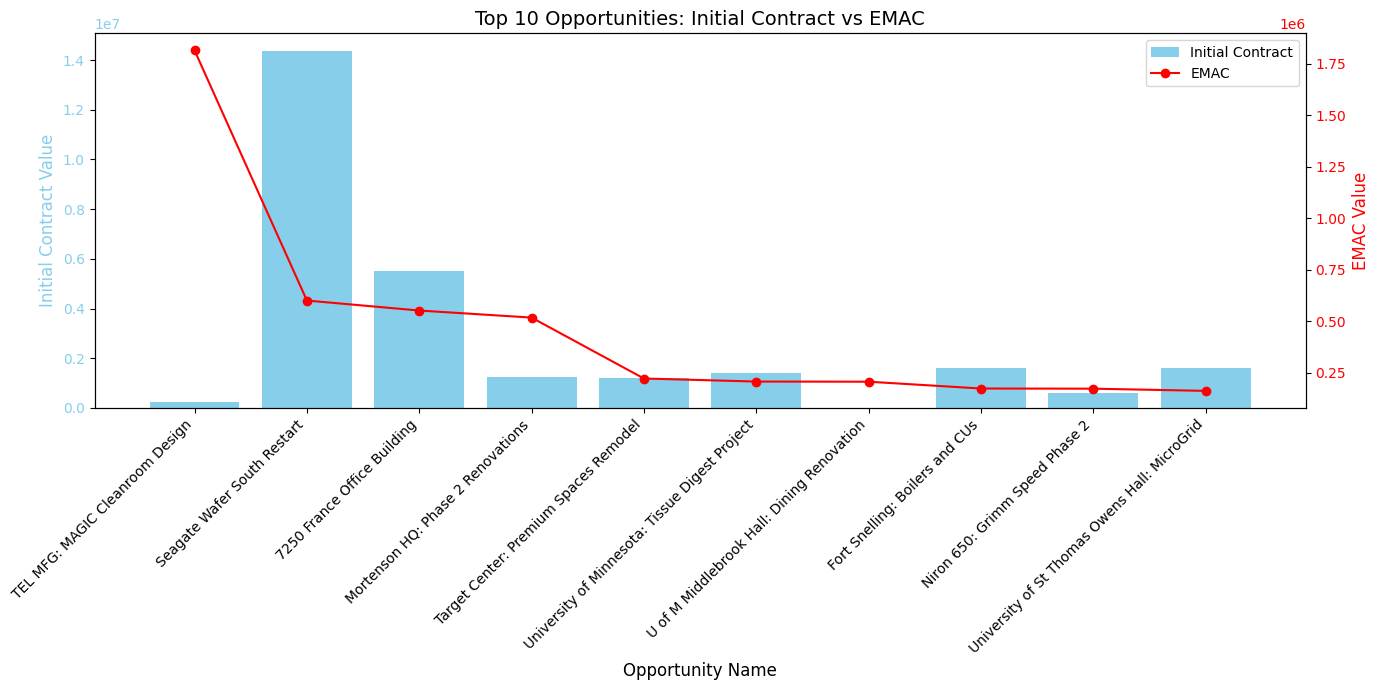

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Sort the data by emac to display opportunities with the highest emac at the top
data = data.sort_values(by='emac', ascending=False)

# Select top N opportunities
N = 10  # Adjust this value based on how many opportunities you want to display
top_opportunities = data.head(N)

# Create the bar and line chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for init_contract
ax1.bar(top_opportunities['oppt_name'], top_opportunities['init_contract'], color='skyblue', label='Initial Contract')
ax1.set_xlabel('Opportunity Name', fontsize=12)
ax1.set_ylabel('Initial Contract Value', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top_opportunities['oppt_name'], rotation=45, ha='right', fontsize=10)

# Create a second y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(top_opportunities['oppt_name'], top_opportunities['emac'], color='red', marker='o', linestyle='-', label='EMAC')
ax2.set_ylabel('EMAC Value', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout adjustments
plt.title(f'Top {N} Opportunities: Initial Contract vs EMAC', fontsize=14)
fig.tight_layout()

# Show legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()




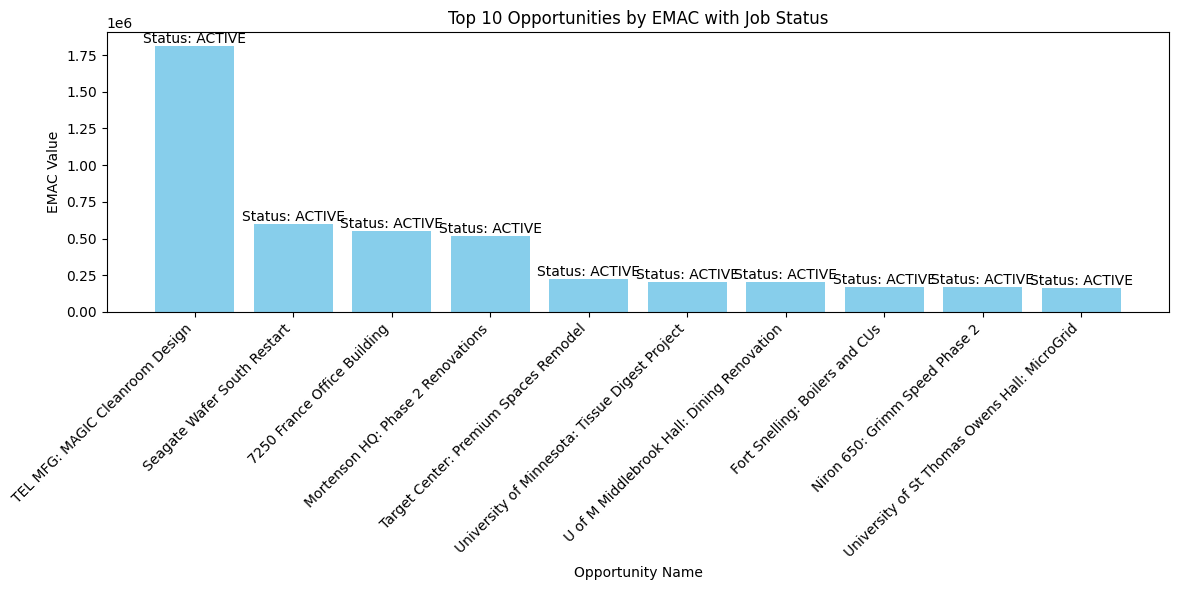

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Sort the data by emac to get the top 10 opportunities
top_10_opportunities = data.nlargest(10, 'emac')

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_opportunities['oppt_name'], top_10_opportunities['emac'], color='skyblue')

# Add labels and title
plt.xlabel('Opportunity Name')
plt.ylabel('EMAC Value')
plt.title('Top 10 Opportunities by EMAC with Job Status')
plt.xticks(rotation=45, ha='right')

# Add job status as text annotations
for i, (oppt_name, job_status) in enumerate(zip(top_10_opportunities['oppt_name'], top_10_opportunities['job_status'])):
    plt.text(i, top_10_opportunities['emac'].iloc[i], f'Status: {job_status}', ha='center', va='bottom')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


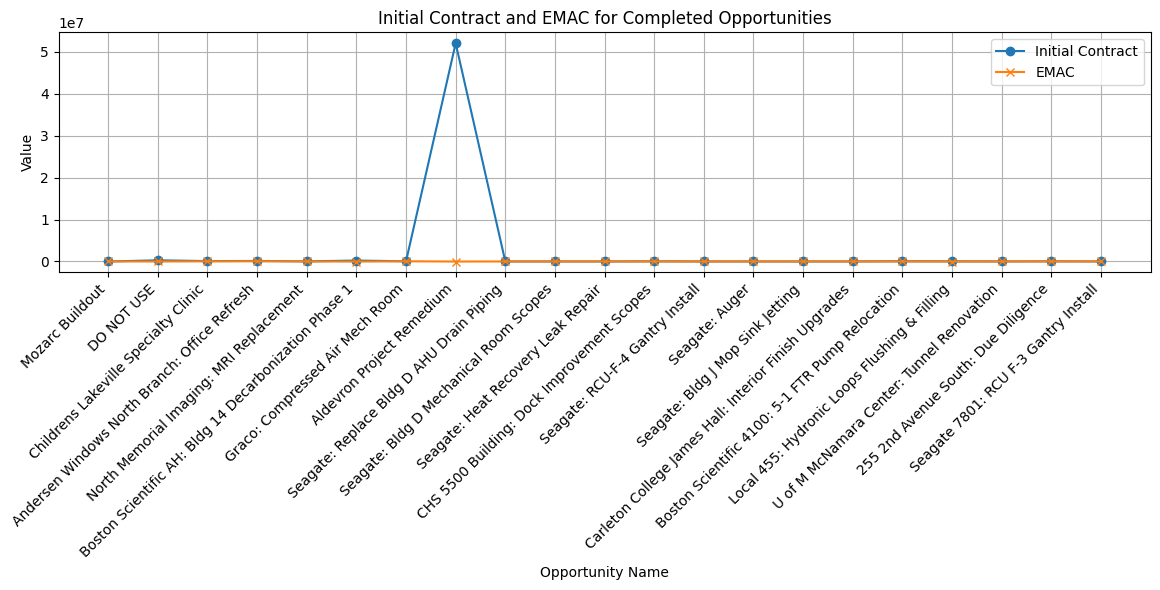

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Filter data for 'COMPLETE' job_status
completed_data = data[data['job_status'] == 'COMPLETE']

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(completed_data['oppt_name'], completed_data['init_contract'], label='Initial Contract', marker='o')
plt.plot(completed_data['oppt_name'], completed_data['emac'], label='EMAC', marker='x')

# Customize the chart
plt.xlabel('Opportunity Name')
plt.ylabel('Value')
plt.title('Initial Contract and EMAC for Completed Opportunities')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()

# Show the plot
plt.show()



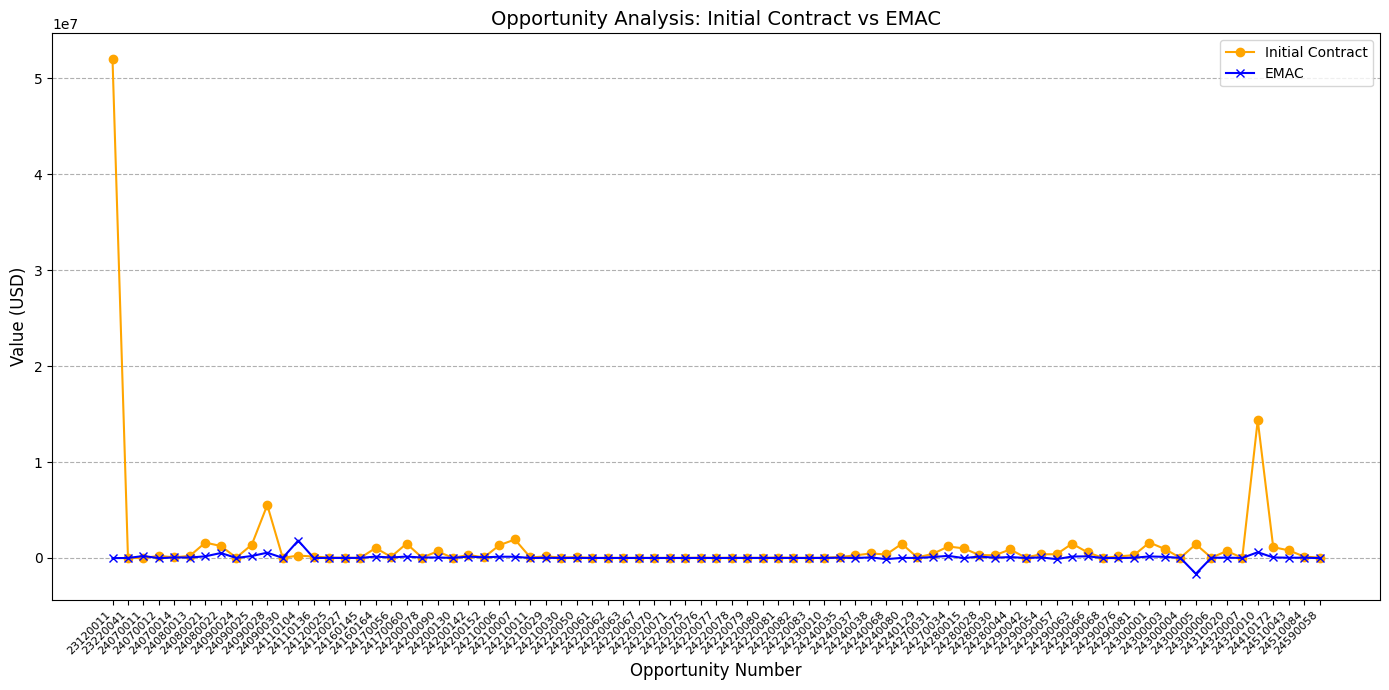

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Sort the DataFrame by oppt_num for better visualization
data = data.sort_values(by='oppt_num')

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Initial Contract and EMAC as lines
plt.plot(data['oppt_num'].astype(str), data['init_contract'], marker='o', linestyle='-', color='orange', label='Initial Contract')
plt.plot(data['oppt_num'].astype(str), data['emac'], marker='x', linestyle='-', color='blue', label='EMAC')

# Customize the plot
plt.xlabel('Opportunity Number', fontsize=12)
plt.ylabel('Value (USD)', fontsize=12)
plt.title('Opportunity Analysis: Initial Contract vs EMAC', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.legend()  # Show legend to differentiate between Initial Contract and EMAC

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


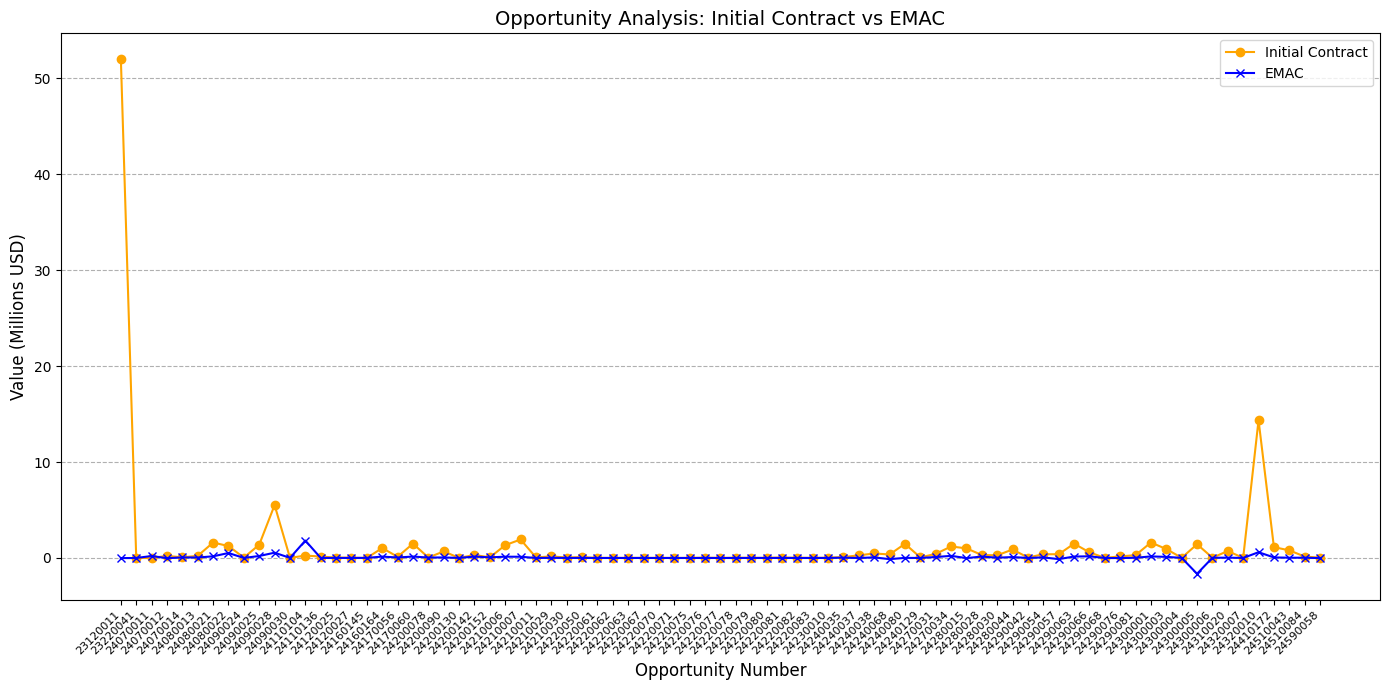

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Determine the scale for init_contract and emac
max_value = max(data['init_contract'].max(), data['emac'].max())

if max_value >= 1e6:
    scale = 1e6
    unit = 'Millions'
elif max_value >= 1e3:
    scale = 1e3
    unit = 'Thousands'
else:
    scale = 1
    unit = ''

# Scale the values
data['init_contract_scaled'] = data['init_contract'] / scale
data['emac_scaled'] = data['emac'] / scale

# Sort the DataFrame by oppt_num for better visualization
data = data.sort_values(by='oppt_num')

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Initial Contract and EMAC as lines
plt.plot(data['oppt_num'].astype(str), data['init_contract_scaled'], marker='o', linestyle='-', color='orange', label='Initial Contract')
plt.plot(data['oppt_num'].astype(str), data['emac_scaled'], marker='x', linestyle='-', color='blue', label='EMAC')

# Customize the plot
plt.xlabel('Opportunity Number', fontsize=12)
plt.ylabel(f'Value ({unit} USD)', fontsize=12)
plt.title('Opportunity Analysis: Initial Contract vs EMAC', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.legend()  # Show legend to differentiate between Initial Contract and EMAC

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



Sales Representative Performance Analysis:
             total_emac  avg_contract_value  avg_init_contract  success_rate  \
sales_rep                                                                      
Get It Team  4794007.46        1.474154e+06       1.288567e+06           1.0   

             exceed_rate  
sales_rep                 
Get It Team     0.050633  

Customer Analysis:
                                                    total_emac  \
customer                                                         
ACI Construction Group                               172687.51   
Adolfson & Peterson Inc                                3145.70   
Adolphson & Peterson Construction                    551300.00   
Ancoats LLC                                          250892.15   
Boston Scientific (Billing)                             230.25   
Boston Scientific Arden Hills                         40574.37   
CHS Inc Data Center                                    7898.23   
CoBeck Construction 

C:\Users\mvang\AppData\Local\Temp\ipykernel_9060\2287927798.py:17: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



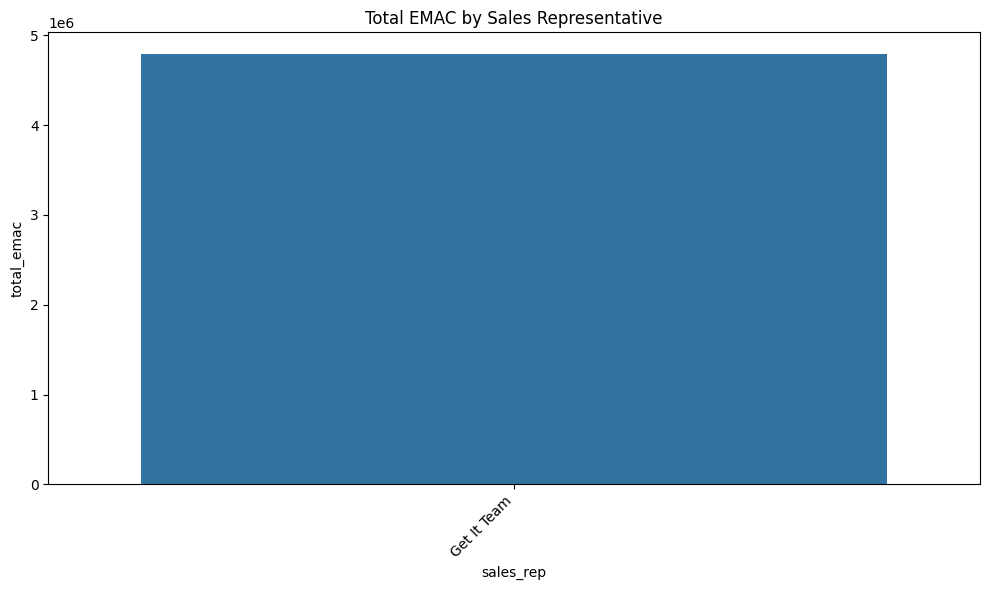

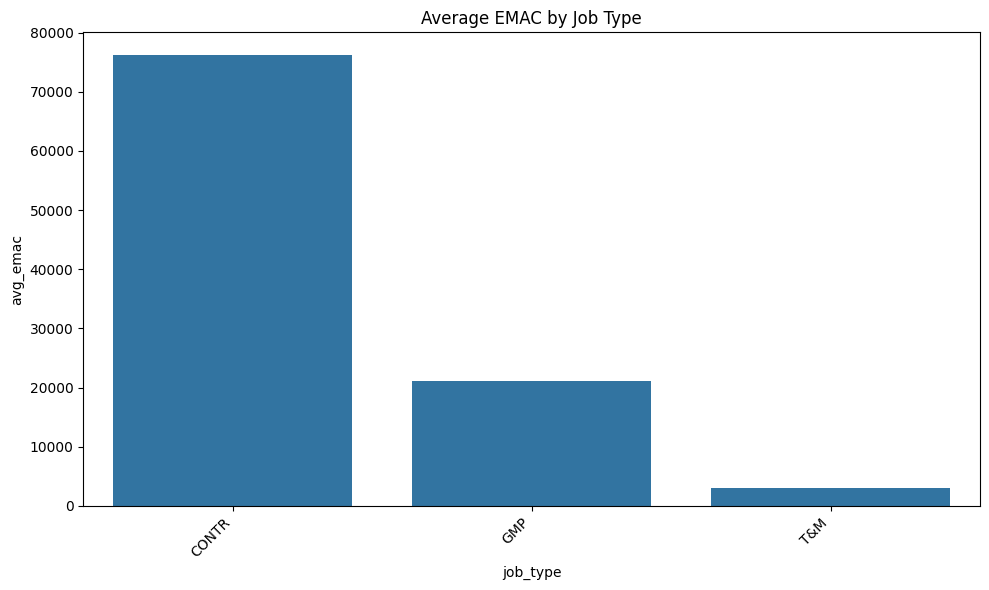

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# 1. Sales Representative Performance Analysis
sales_rep_analysis = data.groupby('sales_rep').agg(
    total_emac=('emac', 'sum'),
    avg_contract_value=('contr_value', 'mean'),
    avg_init_contract=('init_contract', 'mean'),
    success_rate=('status', lambda x: (x == 'Contract/PO').sum() / len(x))
)

sales_rep_analysis['exceed_rate'] = data.groupby('sales_rep').apply(
    lambda x: (x['emac'] > x['init_contract']).sum() / len(x)
)

print("\nSales Representative Performance Analysis:")
print(sales_rep_analysis)

# 2. Customer Analysis
customer_analysis = data.groupby('customer').agg(
    total_emac=('emac', 'sum'),
    total_contract_value=('contr_value', 'sum'),
    num_projects=('oppt_num', 'count'),
    avg_project_size=('contr_value', 'mean')
)
print("\nCustomer Analysis:")
print(customer_analysis)

# 3. Project Timeline Analysis
data['bid_ddate'] = pd.to_datetime(data['bid_ddate'], errors='coerce')
data['contr_sdate'] = pd.to_datetime(data['contr_sdate'], errors='coerce')
data['timeline'] = (data['contr_sdate'] - data['bid_ddate']).dt.days

timeline_analysis = data.groupby('oppt_name')['timeline'].mean()
print("\nProject Timeline Analysis (Days from Bid to Contract Start):")
print(timeline_analysis)

# 4. Job Type and Status Analysis
job_analysis = data.groupby('job_type').agg(
    avg_emac=('emac', 'mean'),
    avg_contract_value=('contr_value', 'mean'),
    avg_init_contract=('init_contract', 'mean'),
    active_proportion=('job_status', lambda x: (x == 'ACTIVE').sum() / len(x)),
    complete_proportion=('job_status', lambda x: (x == 'COMPLETE').sum() / len(x))
)
print("\nJob Type Analysis:")
print(job_analysis)

# 5. Profit Margin Analysis
data['profit_margin'] = (data['emac'] - data['init_contract']) / data['init_contract']
profit_analysis = data.groupby('oppt_name')['profit_margin'].mean()
print("\nProfit Margin Analysis:")
print(profit_analysis)

# Basic Visualizations (examples)
# Sales Rep EMAC
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_rep_analysis.index, y='total_emac', data=sales_rep_analysis)
plt.xticks(rotation=45, ha='right')
plt.title('Total EMAC by Sales Representative')
plt.tight_layout()
plt.show()

# Job Type Average EMAC
plt.figure(figsize=(10, 6))
sns.barplot(x=job_analysis.index, y='avg_emac', data=job_analysis)
plt.xticks(rotation=45, ha='right')
plt.title('Average EMAC by Job Type')
plt.tight_layout()
plt.show()


  job_type      avg_emac  avg_init_contract
0    CONTR  76236.053621       3.602690e+05
1      GMP  21176.255882       4.757423e+06
2      T&M   3080.000000       6.250000e+03


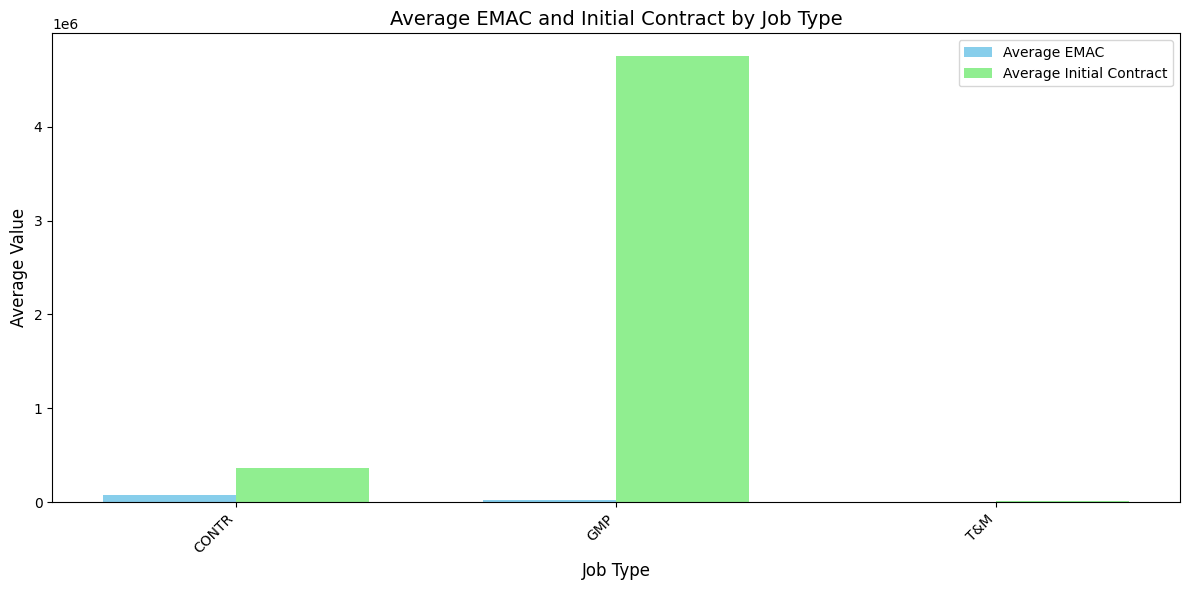

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Job Type Analysis with init_contract and emac
job_analysis = data.groupby('job_type').agg(
    avg_emac=('emac', 'mean'),
    avg_init_contract=('init_contract', 'mean')
).reset_index()

# Print the table
print(job_analysis)

# Create the bar chart
plt.figure(figsize=(12, 6))
width = 0.35  # Width of the bars

# Positions for the bars
r1 = range(len(job_analysis))
r2 = [x + width for x in r1]

# Plotting the bars
plt.bar(r1, job_analysis['avg_emac'], color='skyblue', width=width, label='Average EMAC')
plt.bar(r2, job_analysis['avg_init_contract'], color='lightgreen', width=width, label='Average Initial Contract')

# Add labels, title, and customize the plot
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.title('Average EMAC and Initial Contract by Job Type', fontsize=14)
plt.xticks([r + width/2 for r in range(len(job_analysis))], job_analysis['job_type'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


                 pm_num        emac
0    08 - John Martinez   737019.01
1    09 - Nathan Holewa   768114.92
2       12 - Mike Rouse    -1371.46
3       16 - Cody Kropp  1970469.77
4       17 - Dave Nehls   197387.41
5    20 - Josh Counihan   431735.10
6       21 - Ryan Hayes   322783.45
7   22 - Sam Augspurger    39909.89
8    24 - Dave Schiffer   -18792.16
9       27 - Mark Cahow   319604.01
10    28 - Ty Hlavachek   164938.66
11        29 - Sam Tait   375037.36
12   30 - Brian Gieseke -1465783.17
13  31 - Luke Ringhofer   238913.20
14  32 - Sadie Pankratz   613137.73
15   41 - Elliott Olson    57284.00
16   51 - Emmitt Foster    56519.92
17  59 - Jeremy Schauer   -12900.18


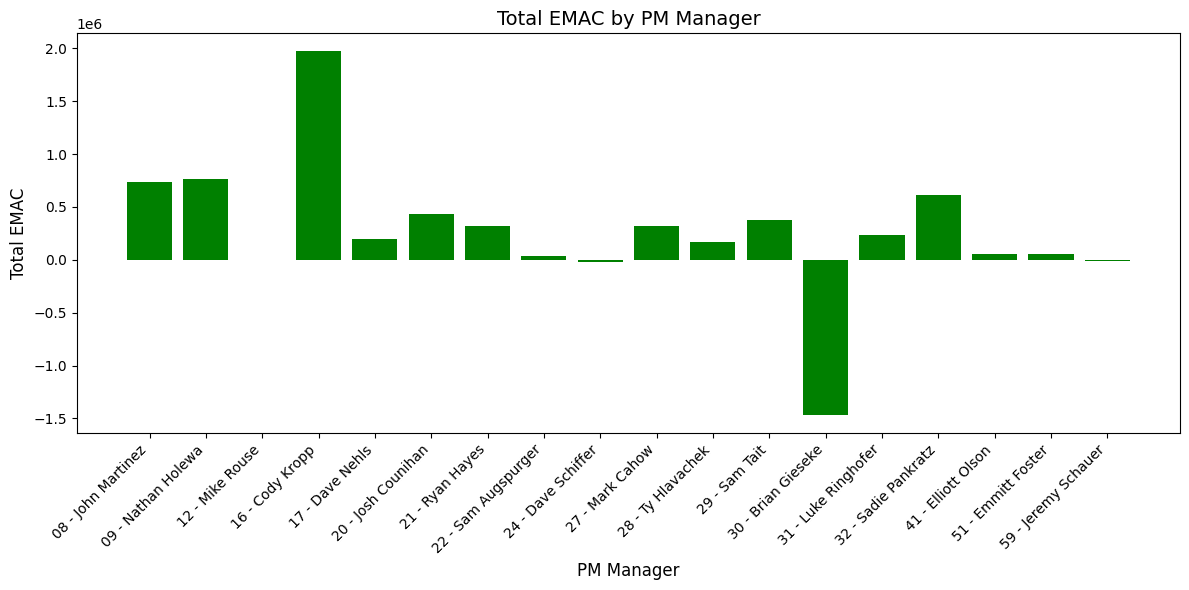

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Total EMAC by PM Manager
pm_manager_emac = data.groupby('pm_num')['emac'].sum().reset_index()

# Print the table
print(pm_manager_emac)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(pm_manager_emac['pm_num'], pm_manager_emac['emac'], color='green')

# Add labels, title, and customize the plot
plt.xlabel('PM Manager', fontsize=12)
plt.ylabel('Total EMAC', fontsize=12)
plt.title('Total EMAC by PM Manager', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


                 pm_num        emac
0    08 - John Martinez   737.01901
1    09 - Nathan Holewa   768.11492
2       12 - Mike Rouse    -1.37146
3       16 - Cody Kropp  1970.46977
4       17 - Dave Nehls   197.38741
5    20 - Josh Counihan   431.73510
6       21 - Ryan Hayes   322.78345
7   22 - Sam Augspurger    39.90989
8    24 - Dave Schiffer   -18.79216
9       27 - Mark Cahow   319.60401
10    28 - Ty Hlavachek   164.93866
11        29 - Sam Tait   375.03736
12   30 - Brian Gieseke -1465.78317
13  31 - Luke Ringhofer   238.91320
14  32 - Sadie Pankratz   613.13773
15   41 - Elliott Olson    57.28400
16   51 - Emmitt Foster    56.51992
17  59 - Jeremy Schauer   -12.90018


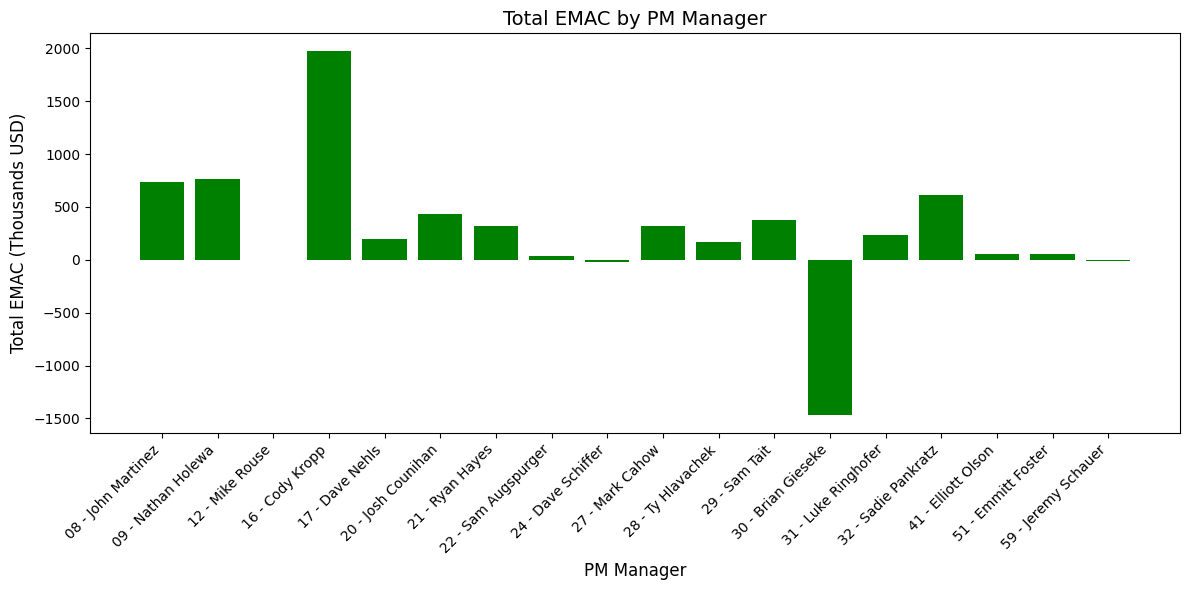

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Total EMAC by PM Manager
pm_manager_emac = data.groupby('pm_num')['emac'].sum().reset_index()

# Convert EMAC to thousands
pm_manager_emac['emac'] = pm_manager_emac['emac'] / 1000

# Print the table
print(pm_manager_emac)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(pm_manager_emac['pm_num'], pm_manager_emac['emac'], color='green')

# Add labels, title, and customize the plot
plt.xlabel('PM Manager', fontsize=12)
plt.ylabel('Total EMAC (Thousands USD)', fontsize=12)
plt.title('Total EMAC by PM Manager', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



C:\Users\mvang\AppData\Local\Temp\ipykernel_9060\3992668830.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



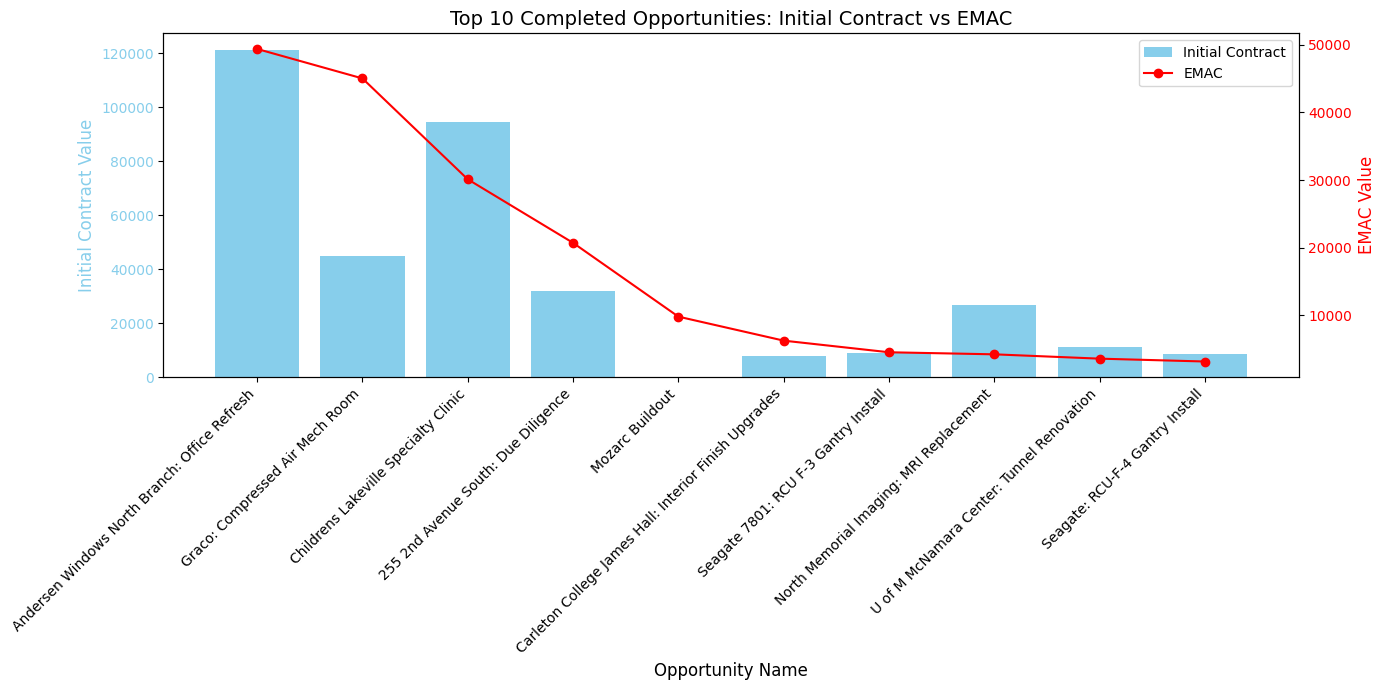

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024oppts.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Filter data for 'COMPLETE' job_status
completed_data = data[data['job_status'] == 'COMPLETE']

# Sort the data by emac to display opportunities with the highest emac at the top
completed_data = completed_data.sort_values(by='emac', ascending=False)

# Select top N opportunities
N = 10  # Adjust this value based on how many opportunities you want to display
top_opportunities = completed_data.head(N)

# Create the bar and line chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for init_contract
ax1.bar(top_opportunities['oppt_name'], top_opportunities['init_contract'], color='skyblue', label='Initial Contract')
ax1.set_xlabel('Opportunity Name', fontsize=12)
ax1.set_ylabel('Initial Contract Value', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top_opportunities['oppt_name'], rotation=45, ha='right', fontsize=10)

# Create a second y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(top_opportunities['oppt_name'], top_opportunities['emac'], color='red', marker='o', linestyle='-', label='EMAC')
ax2.set_ylabel('EMAC Value', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout adjustments
plt.title(f'Top {N} Completed Opportunities: Initial Contract vs EMAC', fontsize=14)
fig.tight_layout()

# Show legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()
